<a href="https://colab.research.google.com/github/abhijain1216/Health-Insurance-Cross-Sell-Prediction-Classification-Project/blob/main/Health_Insurance_Cross_Sell_Prediction_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name** - Abhinav Jain

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/abhijain1216/Health-Insurance-Cross-Sell-Prediction-Classification-Project

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
Insurance_df = pd.read_csv('/content/drive/MyDrive/Projects/Almabetter Classification Capstone Project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [4]:
# Dataset First Look
Insurance_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'Insurance Dataframe : rows = { Insurance_df.shape[0]} , columns = { Insurance_df.shape[1]}')

Insurance Dataframe : rows = 381109 , columns = 12


### Dataset Information

In [6]:
# Dataset Info
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f'Duplicate Values in Insurance Dataframe : {Insurance_df.duplicated().sum()}')

Duplicate Values in Insurance Dataframe : 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
Insurance_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

We don't have any null values or misssing values in Insurance dataframe.

<Axes: >

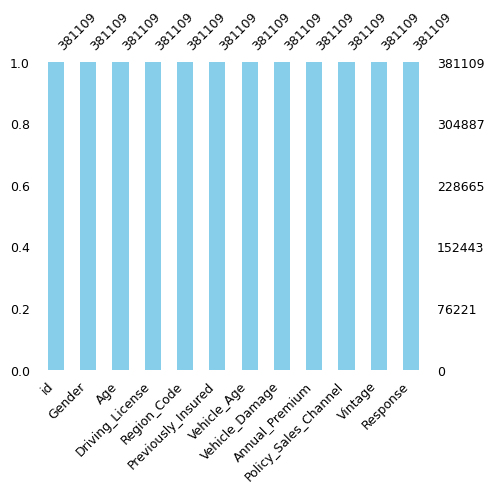

In [9]:
# Visualizing the missing values
msno.bar(Insurance_df,figsize=(5,4),color = 'skyblue',fontsize= 9)

### What did you know about your dataset?

* The dataset has information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.It has approximately 38,000 observations and 12 features.

* There are no null/missing values in the dataframe.

* There are no duplicate values in the dataframe, all rows are unique.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print(f'Columns in Insurance Dataframe : {list(Insurance_df.columns)}')

Columns in Insurance Dataframe : ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [11]:
# Dataset Describe
Insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


### Variables Description

* **id :**	Unique ID for the customer

* **Gender	:** Gender of the customer

* **Age :**	Age of the customer

* **Driving_License :**	0 : Customer does not have DL, 1 : Customer already has DL

* **Region_Code :**	Unique code for the region of the customer

* **Previously_Insured	:** 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

* **Vehicle_Age :**	Age of the Vehicle

* **Vehicle_Damage	 :** 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

* **Annual_Premium	:** The amount customer needs to pay as premium in the year

* **PolicySalesChannel :**	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

* **Vintage :**	Number of Days, Customer has been associated with the company

* **Response :**	1 : Customer is interested, 0 : Customer is not interested

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in list(Insurance_df.columns):
    print(f'unique values in column {i} is : {Insurance_df[i].unique()}')
    print('\n')

unique values in column id is : [     1      2      3 ... 381107 381108 381109]


unique values in column Gender is : ['Male' 'Female']


unique values in column Age is : [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]


unique values in column Driving_License is : [1 0]


unique values in column Region_Code is : [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]


unique values in column Previously_Insured is : [0 1]


unique values in column Vehicle_Age is : ['> 2 Years' '1-2 Year' '< 1 Year']


unique values in column Vehicle_Damage is : ['Yes' 'No']


unique values in column Annual_Premium is : [ 40454.  33536.  38294. ...  20706. 101664.  69845.]


unique values in co

## 3. ***Data Wrangling***

### Data Wrangling Code

Write your code to make your dataset analysis ready.

In [13]:
# Change the datatypes of some columns from float to integer
Insurance_df['Region_Code'] = Insurance_df['Region_Code'].astype('int')
Insurance_df['Annual_Premium'] = Insurance_df['Annual_Premium'].astype('int')
Insurance_df['Policy_Sales_Channel'] = Insurance_df['Policy_Sales_Channel'].astype('int')

In [14]:
# Let's check the datatype of columns
Insurance_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [15]:
# Numerical and categorical features
numerical_features = []
categorical_features = []
for column in list(Insurance_df.columns):
    if (Insurance_df[column].dtype) !='object':
        numerical_features.append(column)
    else:
        categorical_features.append(column)

print('Numerical Features:',numerical_features)
print('\n')
print('Categorical Features:',categorical_features)

Numerical Features: ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


Categorical Features: ['Gender', 'Vehicle_Age', 'Vehicle_Damage']


### What all manipulations have you done and insights you found?

* Changed the datatypes of 'Region_Code', 'Annual_Premium' and 'Policy_Sales_Channel' from float to integer.

* Created two new variables for numerical and categorical features.

* The dataset has eight Numerical Features and three Categorical Features.

* The dataset doesn't require any other changes for now, and it is ready for Exploratory Data Analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univariate Analysis

#### Chart - 1

Distribution of Numerical Variables

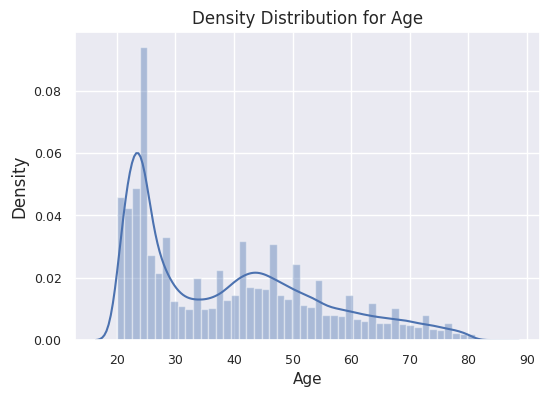

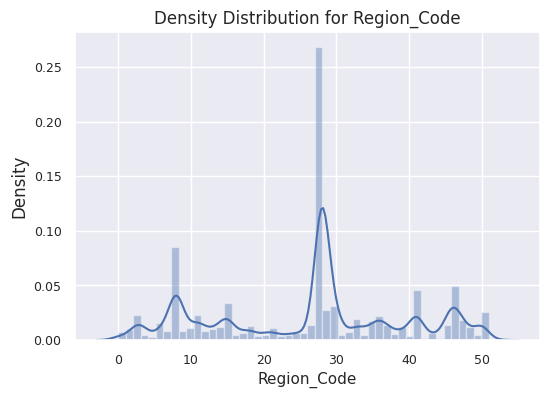

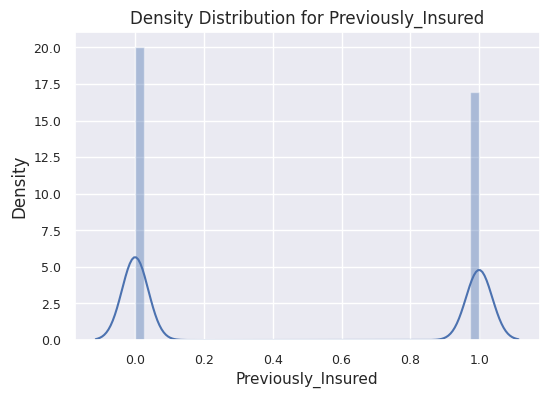

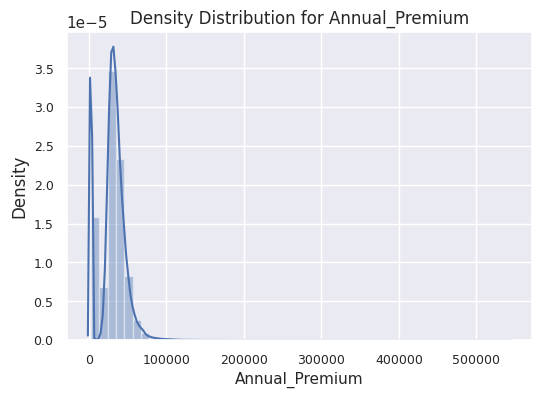

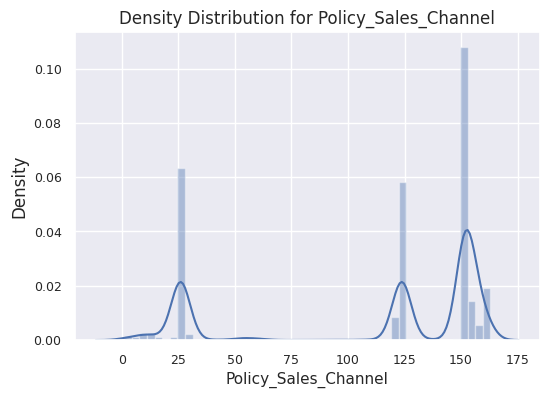

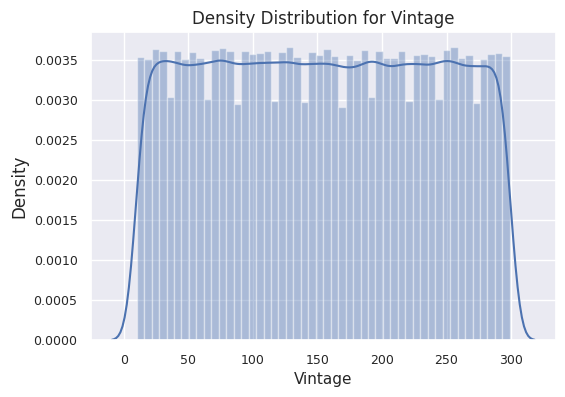

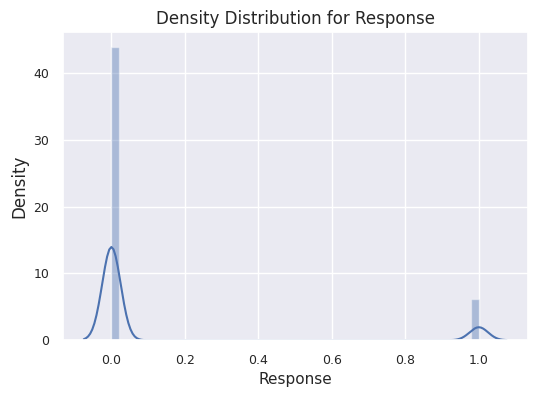

In [16]:
# Chart - 1 visualization code
features = ['Age','Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

# Visulization
sns.set_theme()
for feature in features:
    fig = plt.figure(figsize = (6,4))
    ax = fig.gca()
    sns.distplot(Insurance_df[feature])
    ax.set_title('Density Distribution for'+' '+ feature)
    ax.set_xlabel(feature,fontsize = 11)
    ax.tick_params(labelsize=9)
plt.show()

##### 1. Why did you pick the specific chart?

Distribution plots plot a univariate distribution of data and are of crucial importance for exploratory data analysis. They help us detect outliers and skewness, or get an overview of the measures of central tendency (mean, median, and mode).That's why, to find some insights about numerical columns,we have used a distribution plot.

##### 2. What is/are the insight(s) found from the chart?

* From the distribution plots of the features, it is clear that none of the variables follow a normal distribution.
* Features like 'Age' and 'Annual Premium' have positively skewed distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights that we have found help us to determine the distribution of variables and based on those distribution we will try to formulate our problem like which transformation we need to apply, which scaling mathod will be used, and the choice of algorithm.

#### Chart - 2

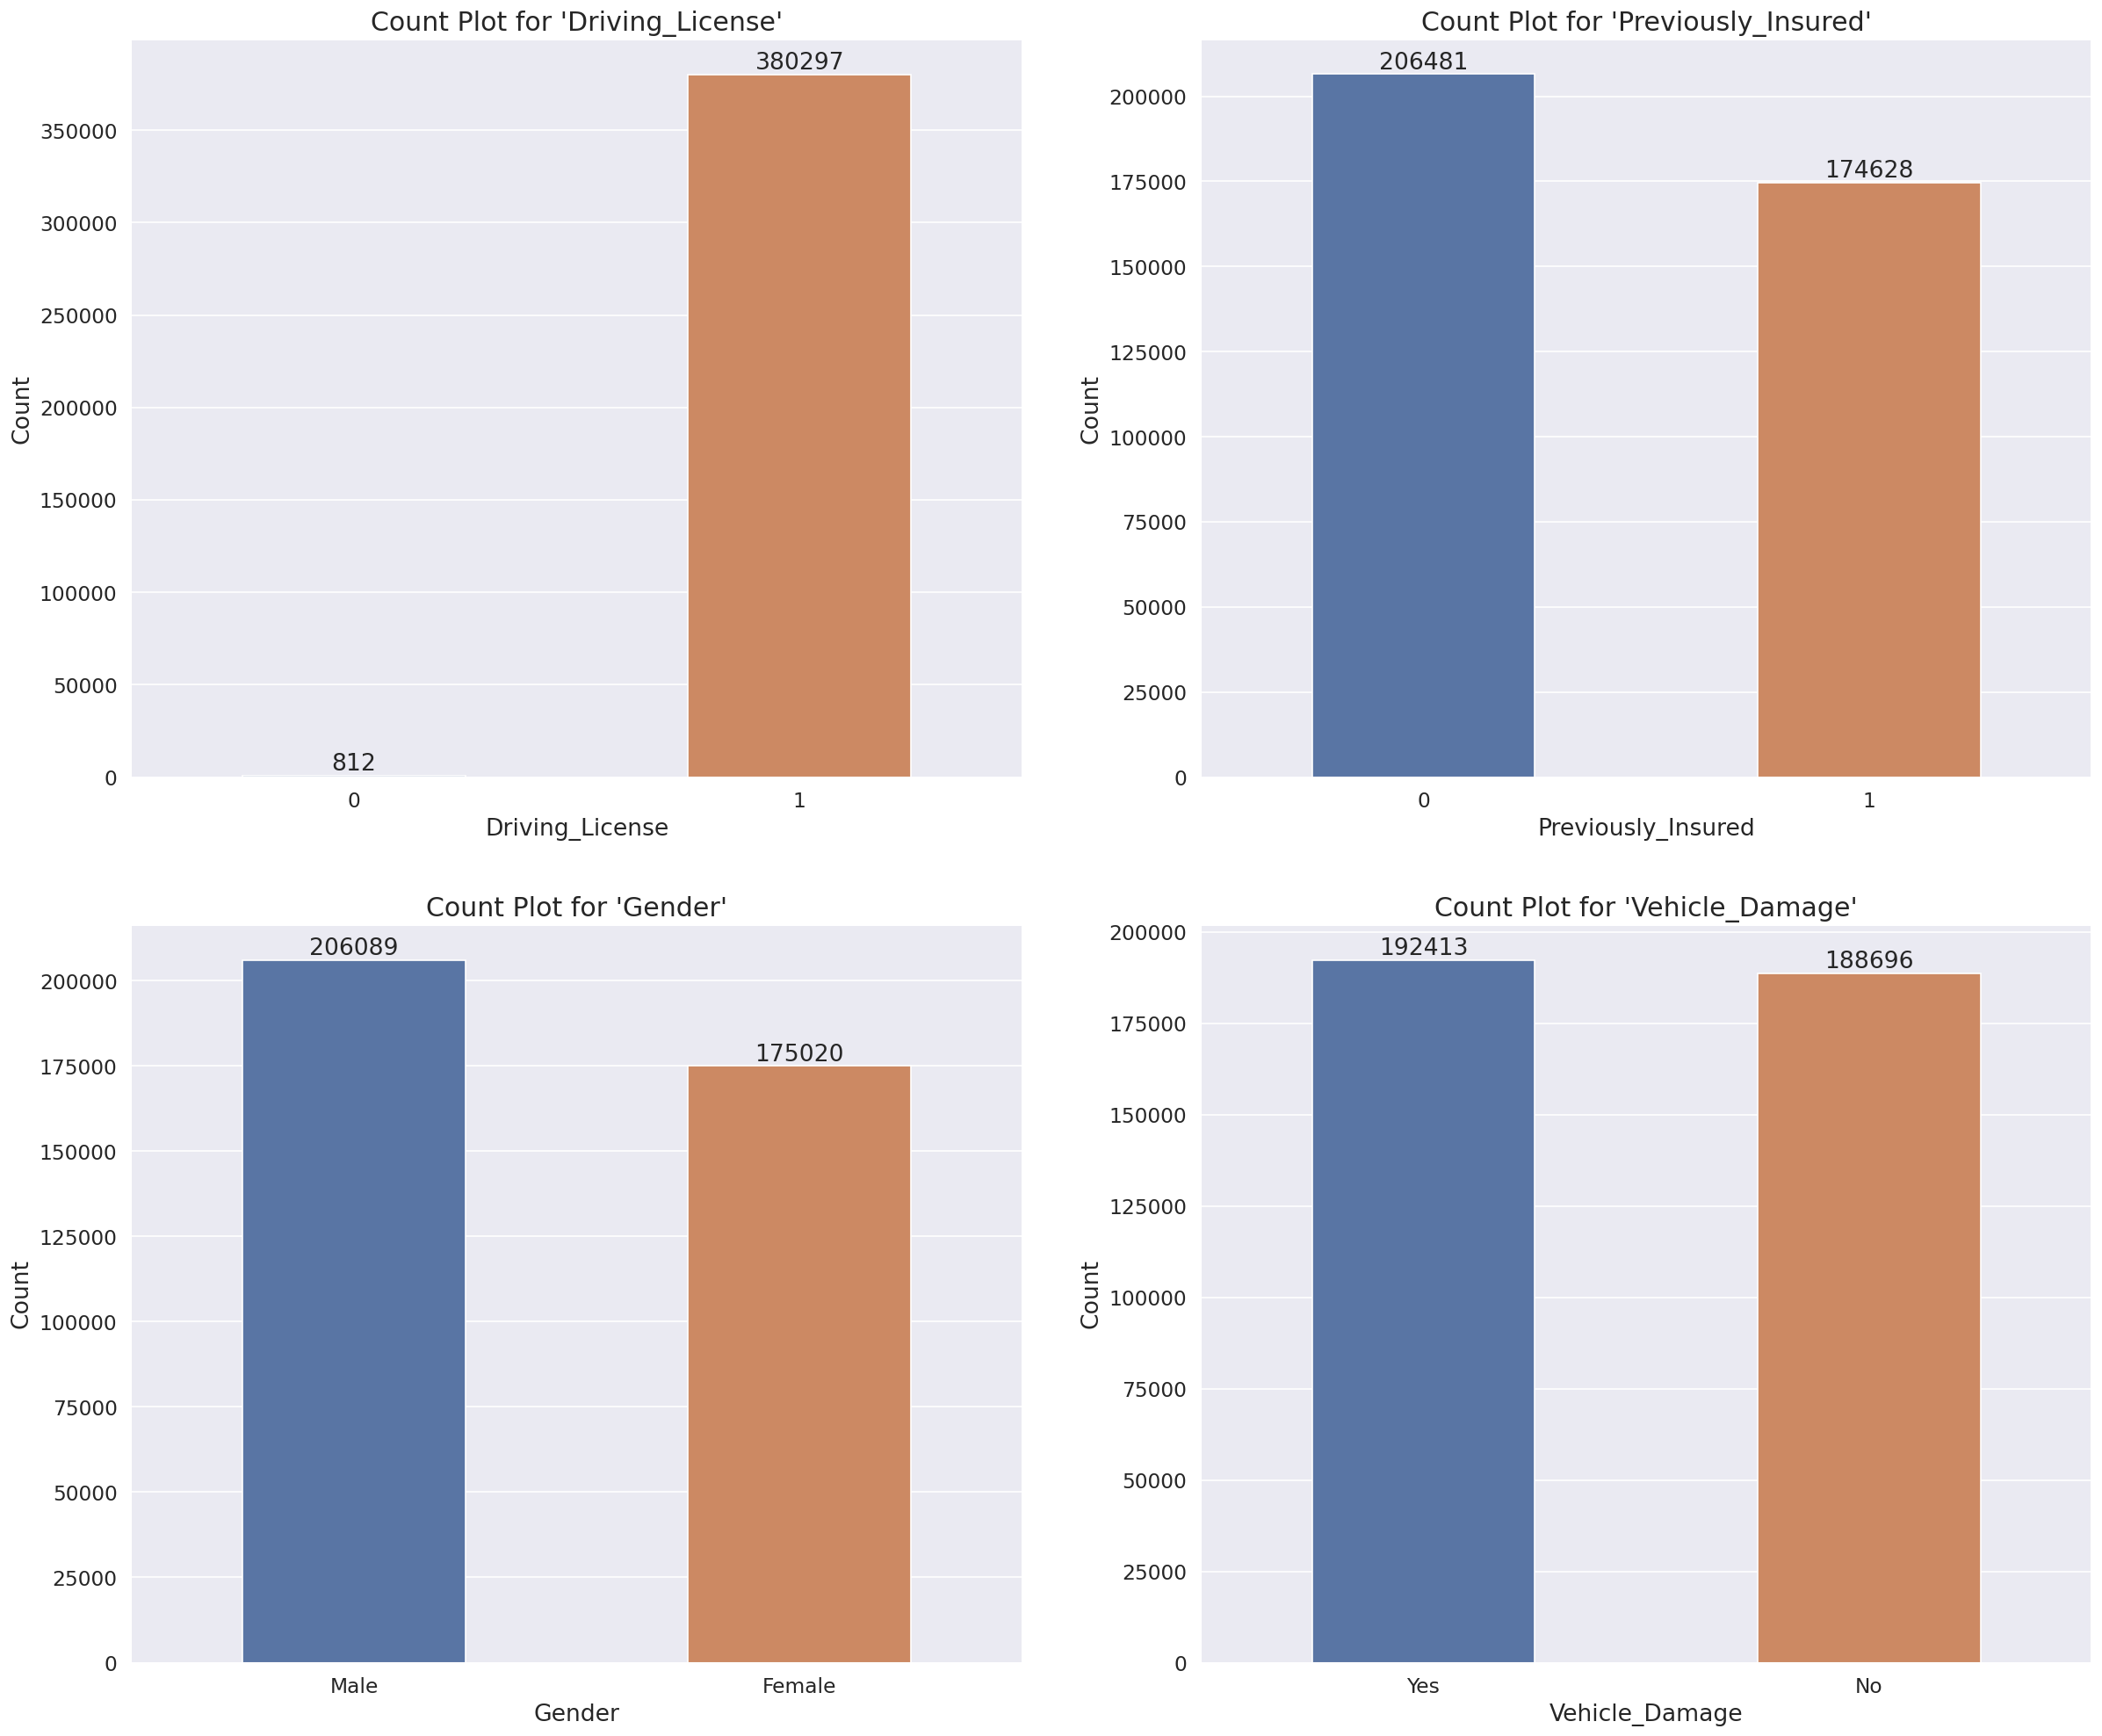

In [17]:
# Chart - 2 visualization code
features = ['Driving_License', 'Previously_Insured','Gender','Vehicle_Damage']
fig,axes = plt.subplots(nrows=2, ncols=2,figsize = (24,20),dpi = 120)
for feature,axes in zip(features,axes.ravel()):
    sns.countplot(data = Insurance_df,x = feature,ax = axes,width = 0.5)
    axes.bar_label(axes.containers[0],fontsize = 16)
    axes.set_title("Count Plot for "+f"'{feature}'",fontsize = 18)
    axes.set_xlabel(feature,fontsize = 16)
    axes.set_ylabel('Count',fontsize = 16)
    axes.tick_params(labelsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Here, we used a bar chart because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* Almost all the customers have driving licences; only 812 people don't.
* There are more male customers than female customers.
* Approximately 1.7 million people already have vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help in determining the count of each category for different variable, which will help in analysing the data more accurately.

#### Chart - 3

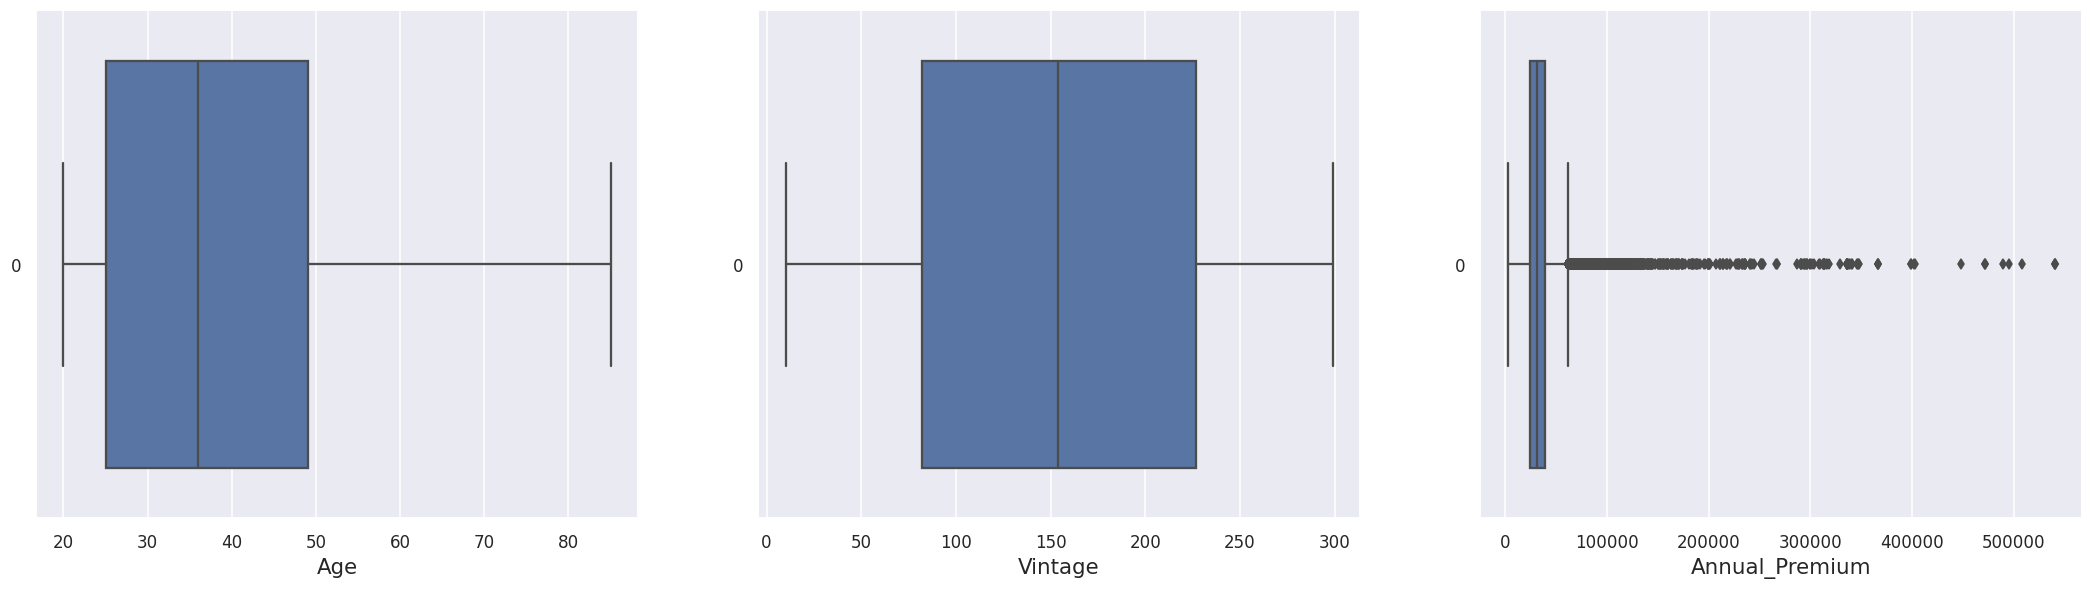

In [18]:
# Chart - 3 visualization code
features = ['Age','Vintage','Annual_Premium']
fig,axes = plt.subplots(nrows=1, ncols=3,figsize = (24,6),dpi = 110)
for feature,axes in zip(features,axes.ravel()):
    sns.boxplot(Insurance_df[feature],ax = axes,orient = 'h')
    axes.set_xlabel(feature,fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

A whisker plot also called a box plot , displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. Thus, for the visualisation of these five statistical measures of the variables,we used a box plot.

##### 2. What is/are the insight(s) found from the chart?

* Features 'Age' and 'Vintage' have no outliers.
* But, 'Annual_Premium' has a large number of outliers, which need to be treated for further analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have found that variable 'Annual_Premium' has very large number of outliers and it is cruicial feature for our problem.We will handle these outliers during Feature engineering step but from the business point of view it important to understand the every aspect of problem, thats why gained insights have a positive impact on business.


#### Chart - 4

In [19]:
# Chart - 4 visualization code

Policy_Sales_Channel_df = Insurance_df['Policy_Sales_Channel'].value_counts().reset_index().rename(columns = {'index':'Policy_Sales_Channel','Policy_Sales_Channel':'Total_count'})
Policy_Sales_Channel_df

,Policy_Sales_Channel,Total_count
0,152,134784
1,26,79700
2,124,73995
3,160,21779
4,156,10661
...,...,...
150,149,1
151,43,1
152,144,1
153,143,1


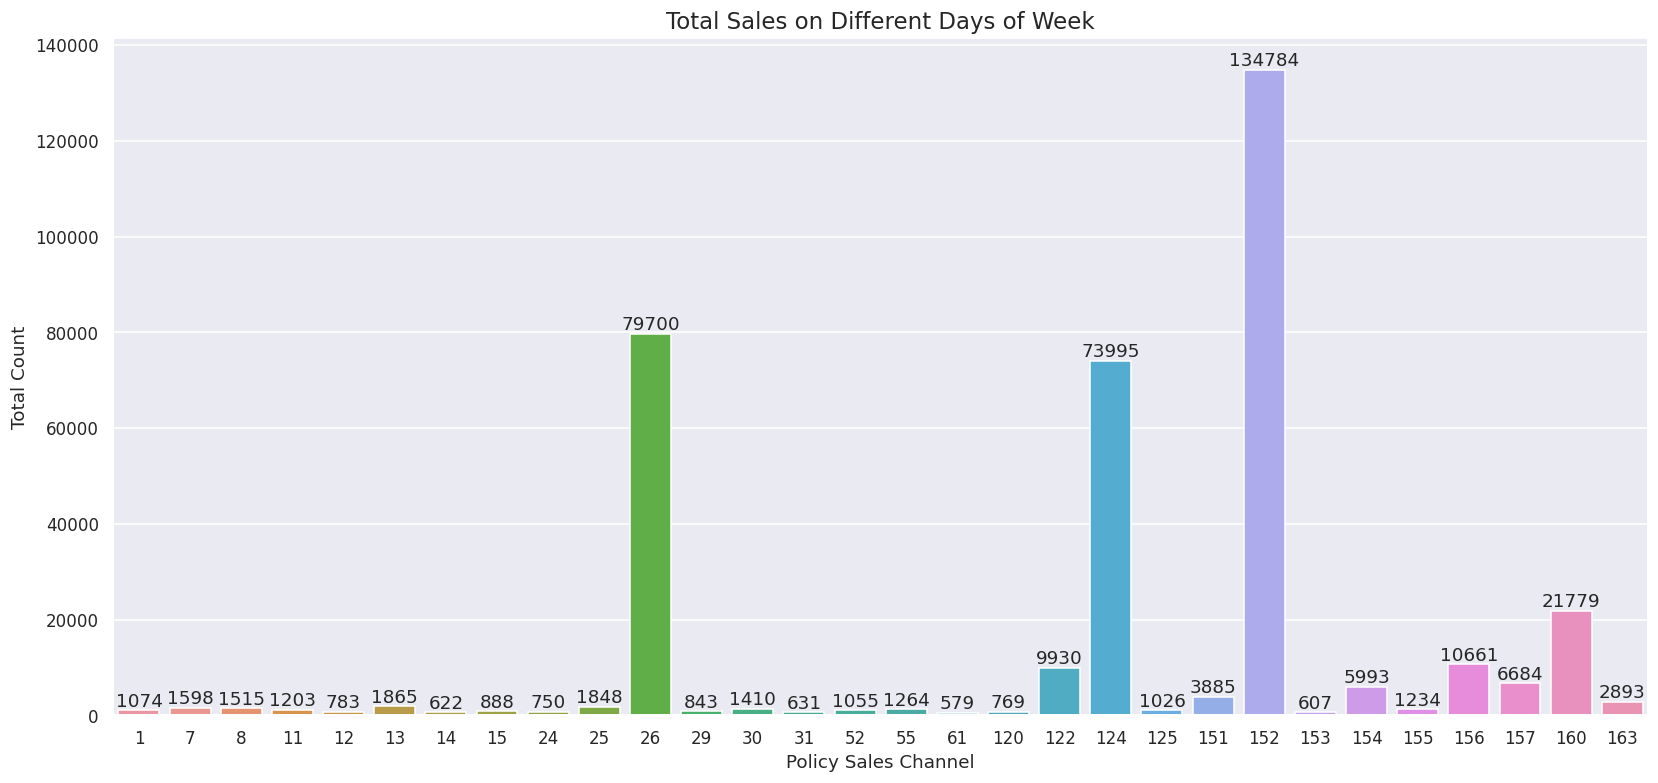

In [20]:
# visualization code
plt.figure(figsize = (18,8),dpi = 110)
plot = sns.barplot(data = Policy_Sales_Channel_df[:30],x = 'Policy_Sales_Channel',y = 'Total_count')
plt.bar_label(plot.containers[0], label_type='edge')
plt.title('Total Sales on Different Days of Week',fontsize = 15)
plt.ylabel('Total Count')
plt.xlabel('Policy Sales Channel')
plt.show()

##### 1. Why did you pick the specific chart?

Here, we used a bar chart because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* Channel codes 152, 124, and 26 are the busiest channels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights will be helpful in uniformly distributing the workload between policy sales channels so that it is easy to reach the customer as soon as possible without delaying service. This leads to customer satisfaction and improvement in customer service; hence, these insights create a positive business impact.

#### Chart - 5

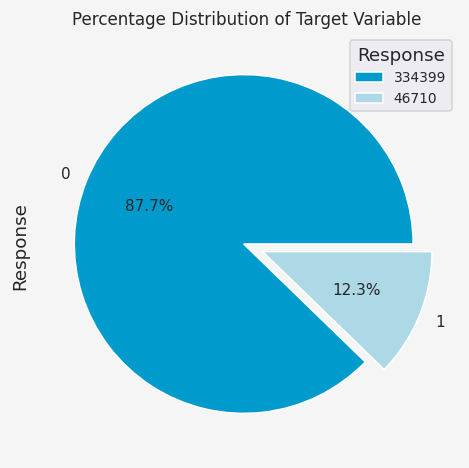

In [21]:
# Chart - 5 visualization code
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4']
plt.figure(figsize = (6,5),dpi = 110,facecolor = 'whitesmoke')
Insurance_df['Response'].value_counts().plot.pie(colors = color_palette_list,textprops = {'size': 'small'},autopct='%1.1f%%',explode = [0.02,0.1])
plt.legend(title='Response', fontsize='9',labels = Insurance_df['Response'].value_counts().values)
plt.title('Percentage Distribution of Target Variable',fontsize=11)
plt.show()

##### 1. Why did you pick the specific chart?

 we used a pie chart because a pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used.

##### 2. What is/are the insight(s) found from the chart?

* Approximately 88% of customers are not interested in taking Insurance.
* Only 12.3 % are interested in Vehicle Insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights we have found from the pie chart give information regarding the response of customers, like how many of them are interested in vehicle insurance or not,which will help the company plan a strategy for selling insurance in the near future.

#### Chart - 6

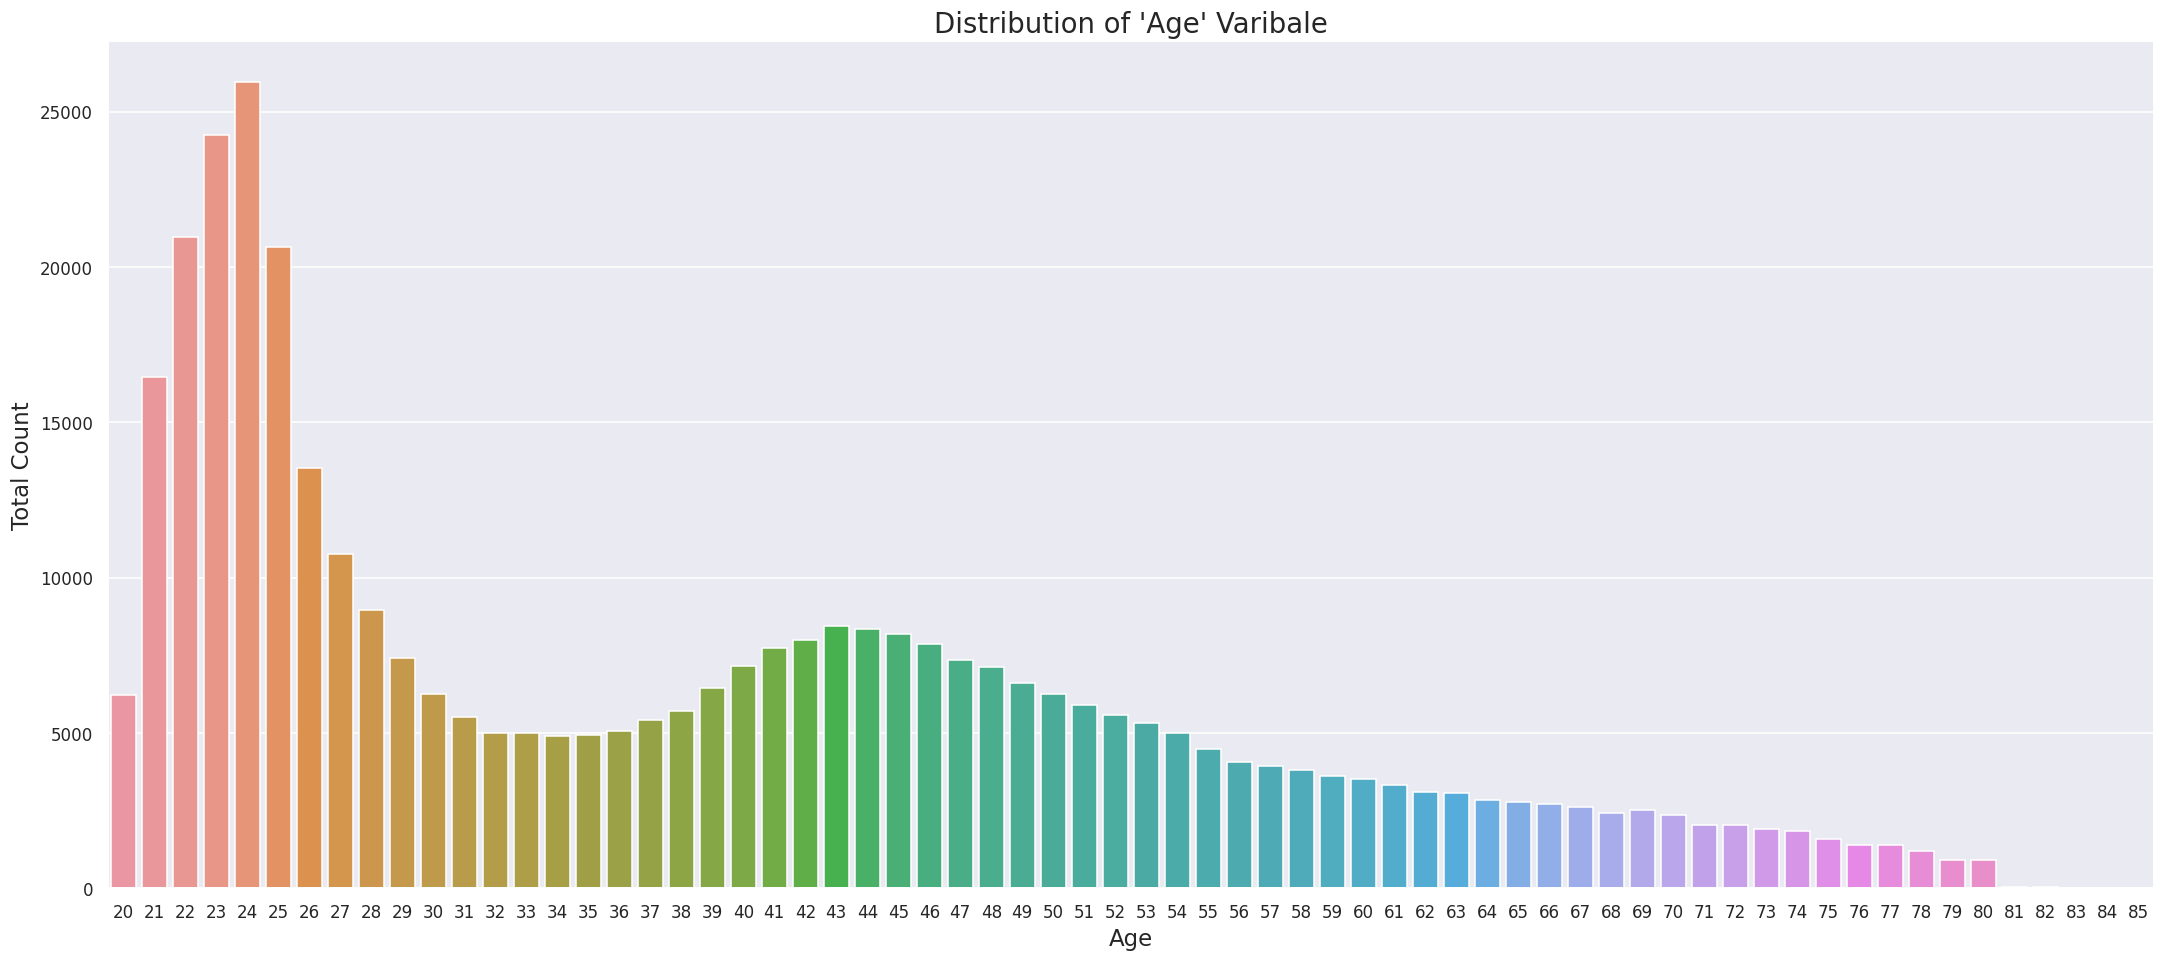

In [22]:
# Chart - 6 visualization code
plt.figure(figsize=(24,10),dpi = 110)
sns.countplot(data = Insurance_df,x = 'Age')
plt.title("Distribution of 'Age' Varibale",fontsize = 18)
plt.ylabel('Total Count',fontsize = 15)
plt.xlabel('Age',fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot shows the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. That's why, to show the count of each category in a categorical variable, we used a count plot.

##### 2. What is/are the insight(s) found from the chart?

* Most of the customers are in the age group of 21–30 and 35–53.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from the above count plot tell about the distribution of customers based on age and help the company target an audience based on the age of customers, which will lead the company towards positive growth.

## Bivariate and Multivariate Analysis

In [23]:
# Create a function to get Percentage Distributuion of feature and to get distribution of Response according to that feature

def plot_response_by_feature(df,feature1,feature2):
    # Figure parameters
    fig = plt.figure(figsize=(16, 6),dpi = 110)
    plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

    # Percentage distribution of feature
    sub1 = fig.add_subplot(1,2,1)
    df1 = df[feature1].value_counts().reset_index().rename(columns = {'index':f"{feature1}",f"{feature1}":'Total_count'})  # Dataframe for Value counts
    plot_labels = tuple(zip(df1[feature1],df1['Total_count']))
    color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4']
    sub1.pie(df1['Total_count'],labels=df1[feature1].values,colors = color_palette_list,textprops = {'size': 'small'},autopct='%1.1f%%')
    plt.legend(title = f"{feature1}",loc = 'upper right', fontsize='9',labels = plot_labels)
    plt.title("Percentage Dustribution of " + f"'{feature1}'",fontsize = 14)

    # Bar plot for response according to feature values
    sub2 = fig.add_subplot(1,2,2)
    axes = Insurance_df.groupby([feature1,feature2])[feature2].count().unstack().plot(kind = 'bar',ax = sub2)
    for container in axes.containers:
        axes.bar_label(container,fontsize = 11)
    plt.title("Response By " + f"'{feature1}'",fontsize = 14)
    plt.xlabel(f"{feature1}",fontsize = 13)
    plt.ylabel('Total Count',fontsize = 13)
    plt.xticks(rotation = 0)
    plt.show()

Here,we have created a function to get plots so that we will not have need to write same code again and again.

#### Chart - 7

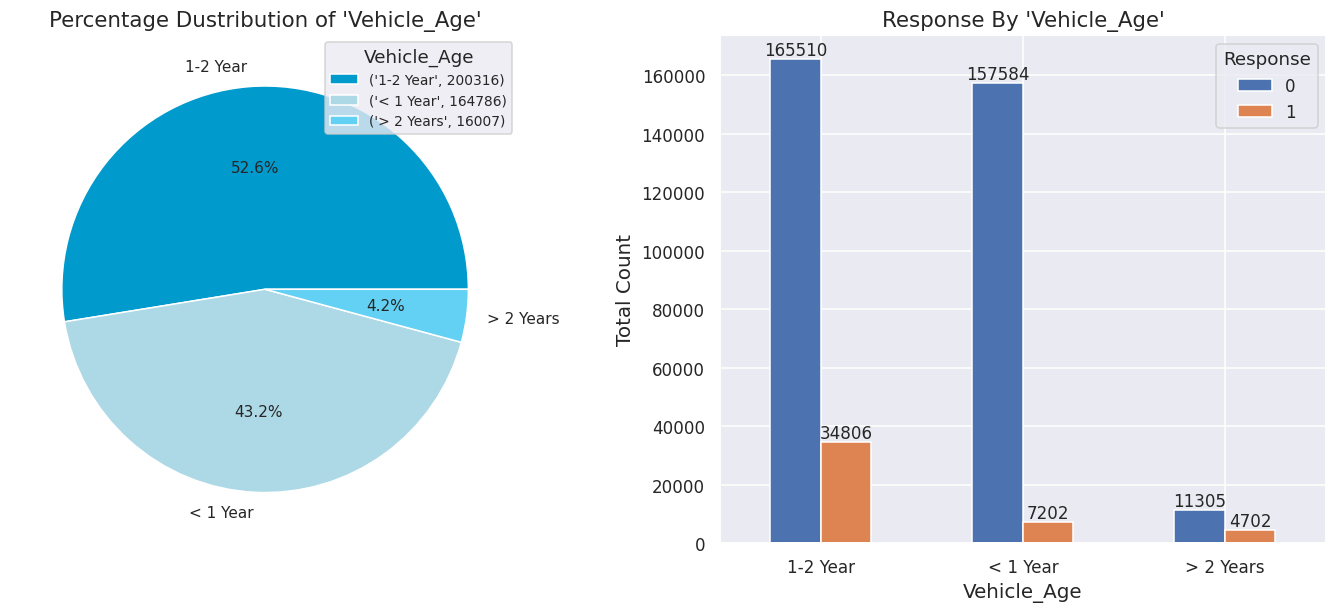

In [24]:
# Chart - 7 visualization code
plot_response_by_feature(Insurance_df,'Vehicle_Age','Response')

##### 1. Why did you pick the specific chart?

* we used a pie chart because a pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used.


* Secondly, we used a multiple bar chart for the visualisation of the 'Response' feature according to 'Vehicle_Age'. In a multiple bar graph, multiple data points for each category of data are shown with the addition of columns. Multiple bar charts are used for comparing different entities.

##### 2. What is/are the insight(s) found from the chart?

* Approximately 57% of the vehicles have an age between 1 and 2 years, and 43% have an age less than 1 year.
* Only 4.2% of vehicles are older than 2 years.
* People who have a vehicle older than 2 years are more interested in insurance; out of 11305 people, 4702 are interested.
* People who have a vehicle which has an age of less than one year, are less interested in insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A pie plot shows the distribution of vehicles according to age, and a bar plot shows the response of customers based on vehicle age. The above insights will be helpful in determining the customer's response regarding the insurance based on the age of their vehicle. This way, the company can target those customers first who have an older car and are interested in taking insurance, and this information will have a positive impact on business.

#### Chart - 8

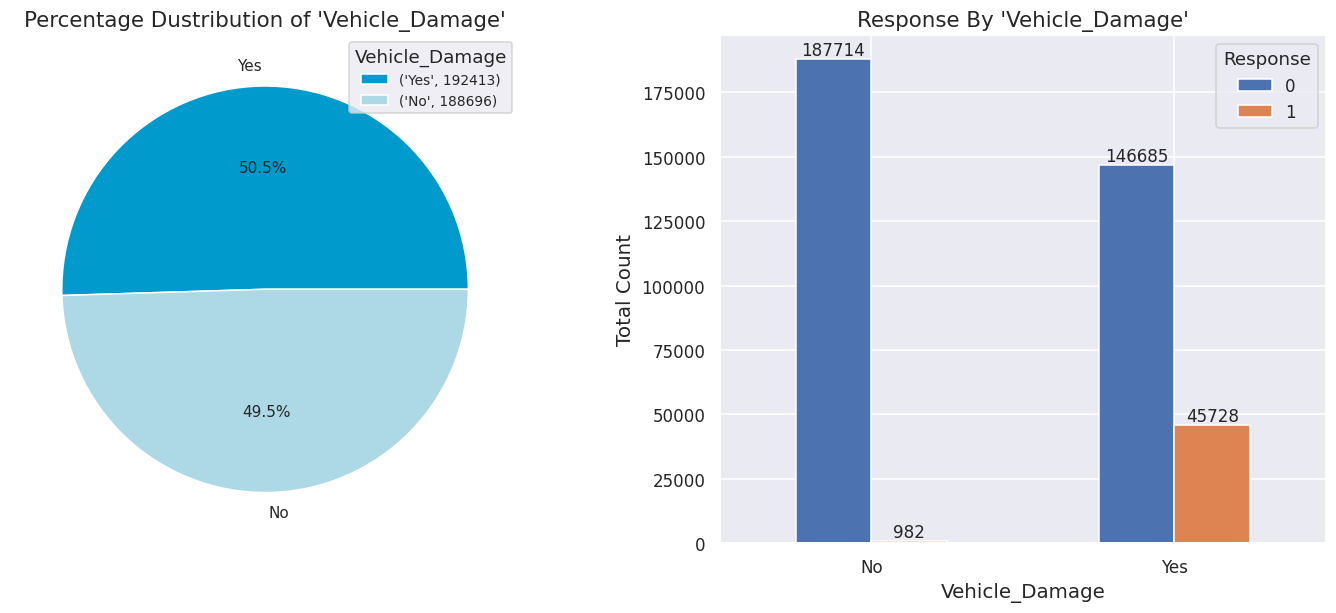

In [25]:
# Chart - 8 visualization code
plot_response_by_feature(Insurance_df,'Vehicle_Damage','Response')

##### 1. Why did you pick the specific chart?

* we used a pie chart because a pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used.


* Secondly, we used a multiple bar chart for the visualisation of the 'Response' feature. In a multiple bar graph, multiple data points for each category of data are shown with the addition of columns. Multiple bar charts are used for comparing different entities.

##### 2. What is/are the insight(s) found from the chart?

* In our data, 50 percent of people have damaged vehicles.
* The interest in insurance is higher among those who have damaged vehicles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The bar plot shows the response of people based on 'Vehicle damage' and we have found that people who have damaged vehicles are more likely to be interested in vehicle insurance. This information will be helpful in determining the customer response regarding the insurance and will help the company set a target regarding insurance sales, which may lead to more profit.

#### Chart - 9

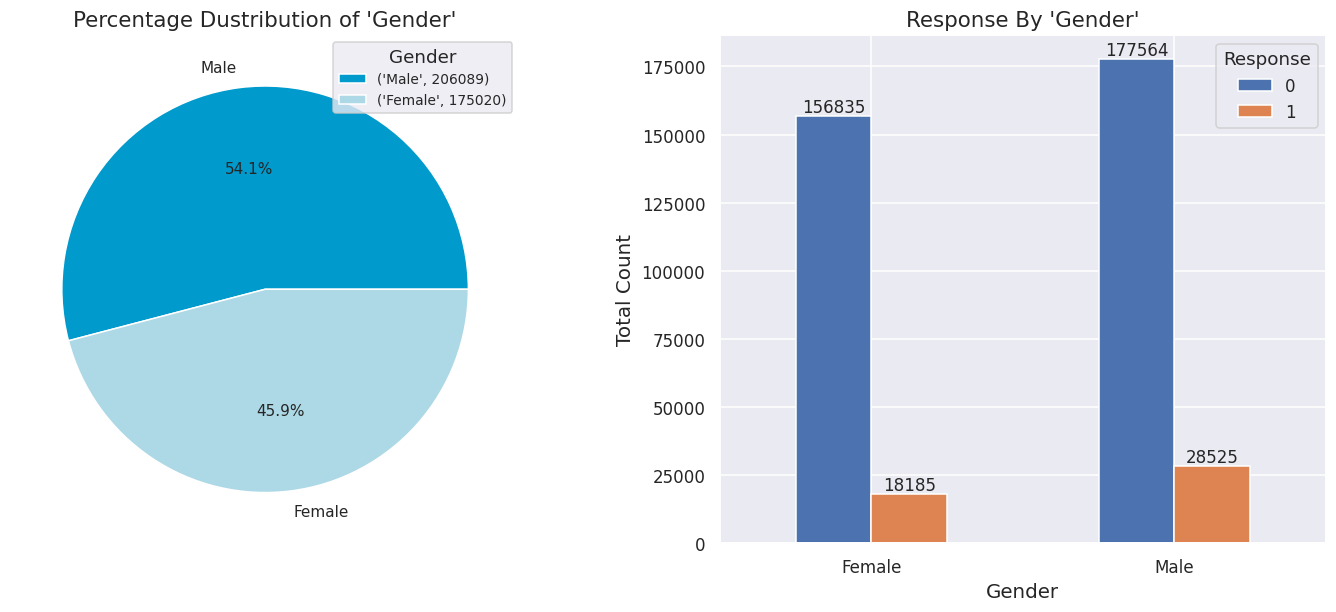

In [26]:
# Chart - 9 visualization code
plot_response_by_feature(Insurance_df,'Gender','Response')

##### 1. Why did you pick the specific chart?

* we used a pie chart because a pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used.


* Secondly, we used a multiple bar chart for the visualisation of the 'Response' feature. In a multiple bar graph, multiple data points for each category of data are shown with the addition of columns. Multiple bar charts are used for comparing different entities.

##### 2. What is/are the insight(s) found from the chart?

* In our data, 54 % are male and 46 % are female.
* From the responses of males and females, we found that males looked more interested in insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information will be helpful in deciding the response of customers based on gender, which is a positive point from the company's point of view and will help in targeting the right audience.

#### Chart - 10

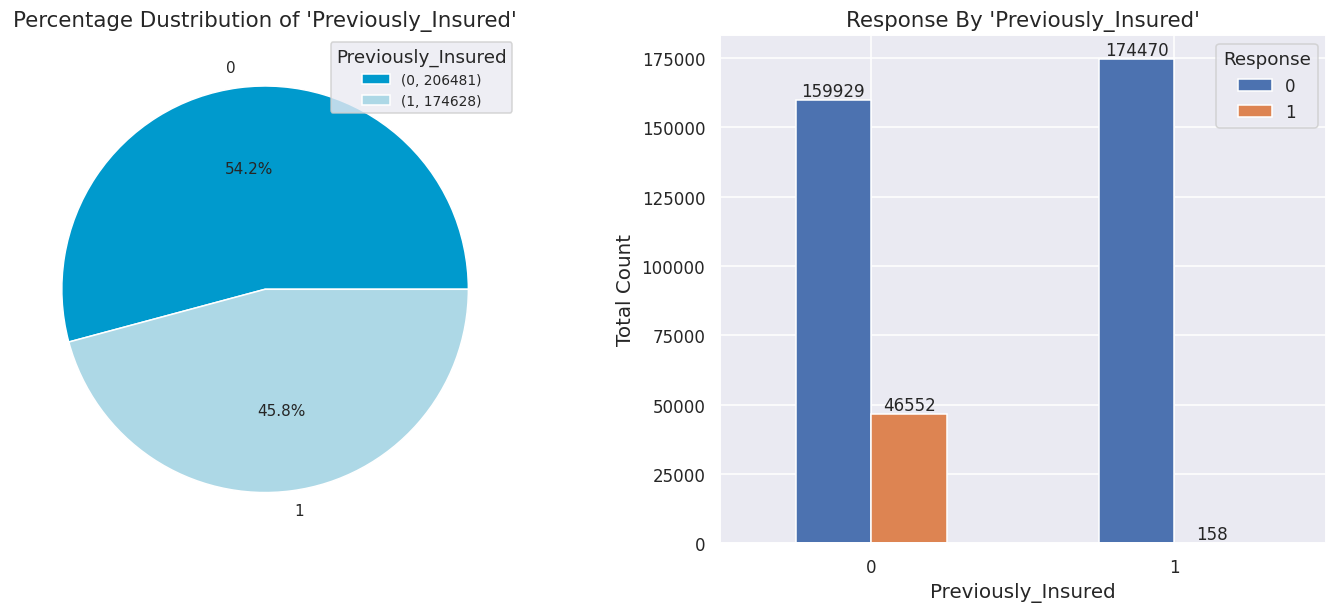

In [27]:
# Chart - 10 visualization code
plot_response_by_feature(Insurance_df,'Previously_Insured','Response')

##### 1. Why did you pick the specific chart?

* we used a pie chart because a pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used.


* In a multiple bar graph, multiple data points for each category of data are shown with the addition of columns. Multiple bar charts are used for comparing different entities. So here, we used a multiple bar chart for the visualisation of the 'response' feature by different categories.

##### 2. What is/are the insight(s) found from the chart?

* From the pie chart, we found that approximately 46% of the people already have insurance and they are less likely to be interested in Insurance.

* Out of the total number of people who don't have any insurance, 46,552 are willing to take it.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here, we have found that customers who don't have any previous insurance are more interested in vehicle insurance. So these insights help the company make a business strategy for selling insurance to those who don't have any. So this information has a positive business impact.

#### Chart - 11

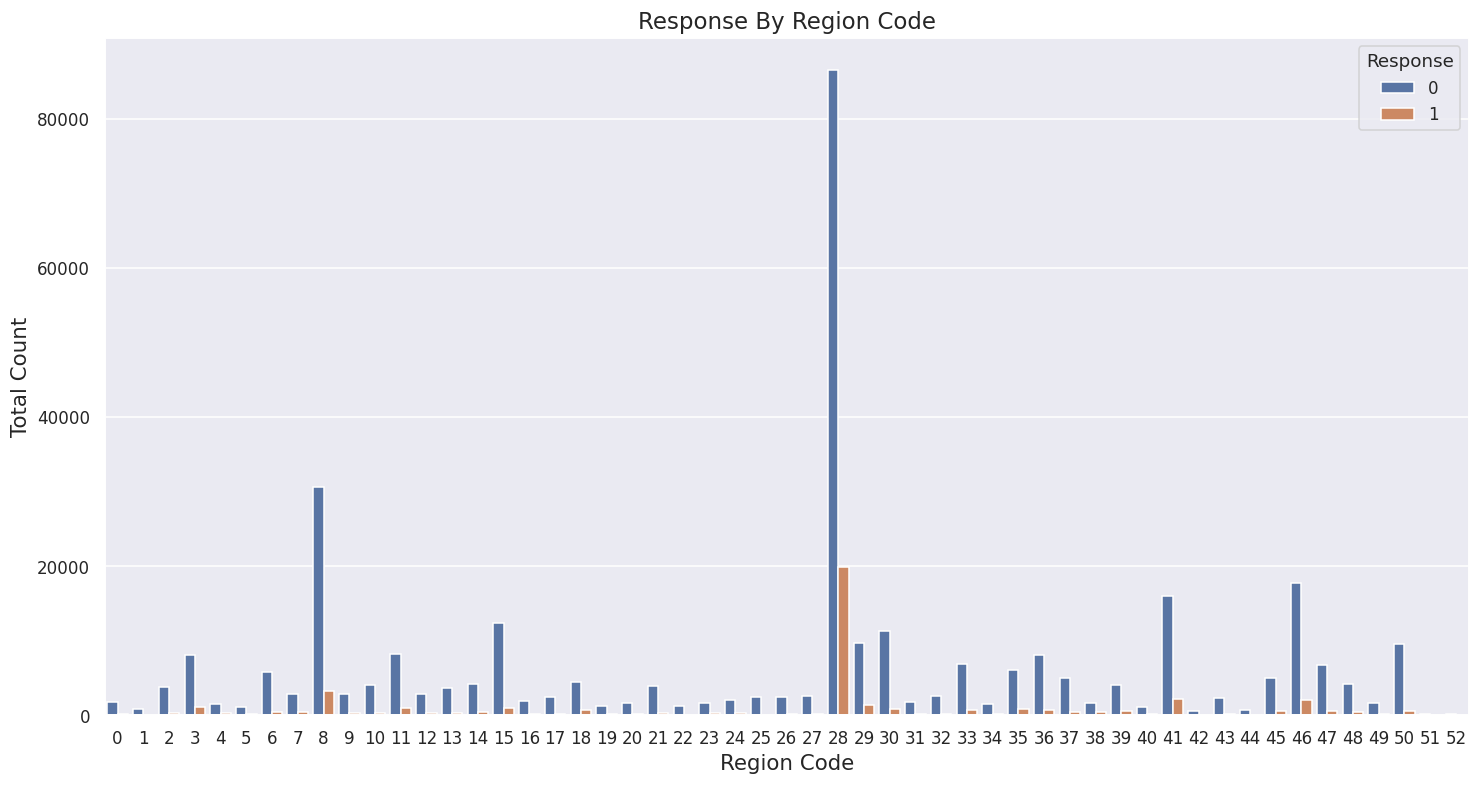

In [28]:
# Chart - 11 visualization code
plt.figure(figsize=(16,8),dpi = 110)
sns.countplot(data= Insurance_df, x='Region_Code',hue='Response')
plt.title("Response By Region Code",fontsize = 15)
plt.xlabel('Region Code',fontsize = 14)
plt.ylabel('Total Count',fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot shows the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. That's why, to show the count of each category in a categorical variable, we used a count plot.

##### 2. What is/are the insight(s) found from the chart?

* People from regions with codes 28, 8, 41, 46, and 11 seem to be more interested in buying insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights that we have found will give information about regions where customers are more interested in buying vehicle insurance, and this information will help in making new business strategies to increase the sales of insurance in those areas.

#### Chart - 12

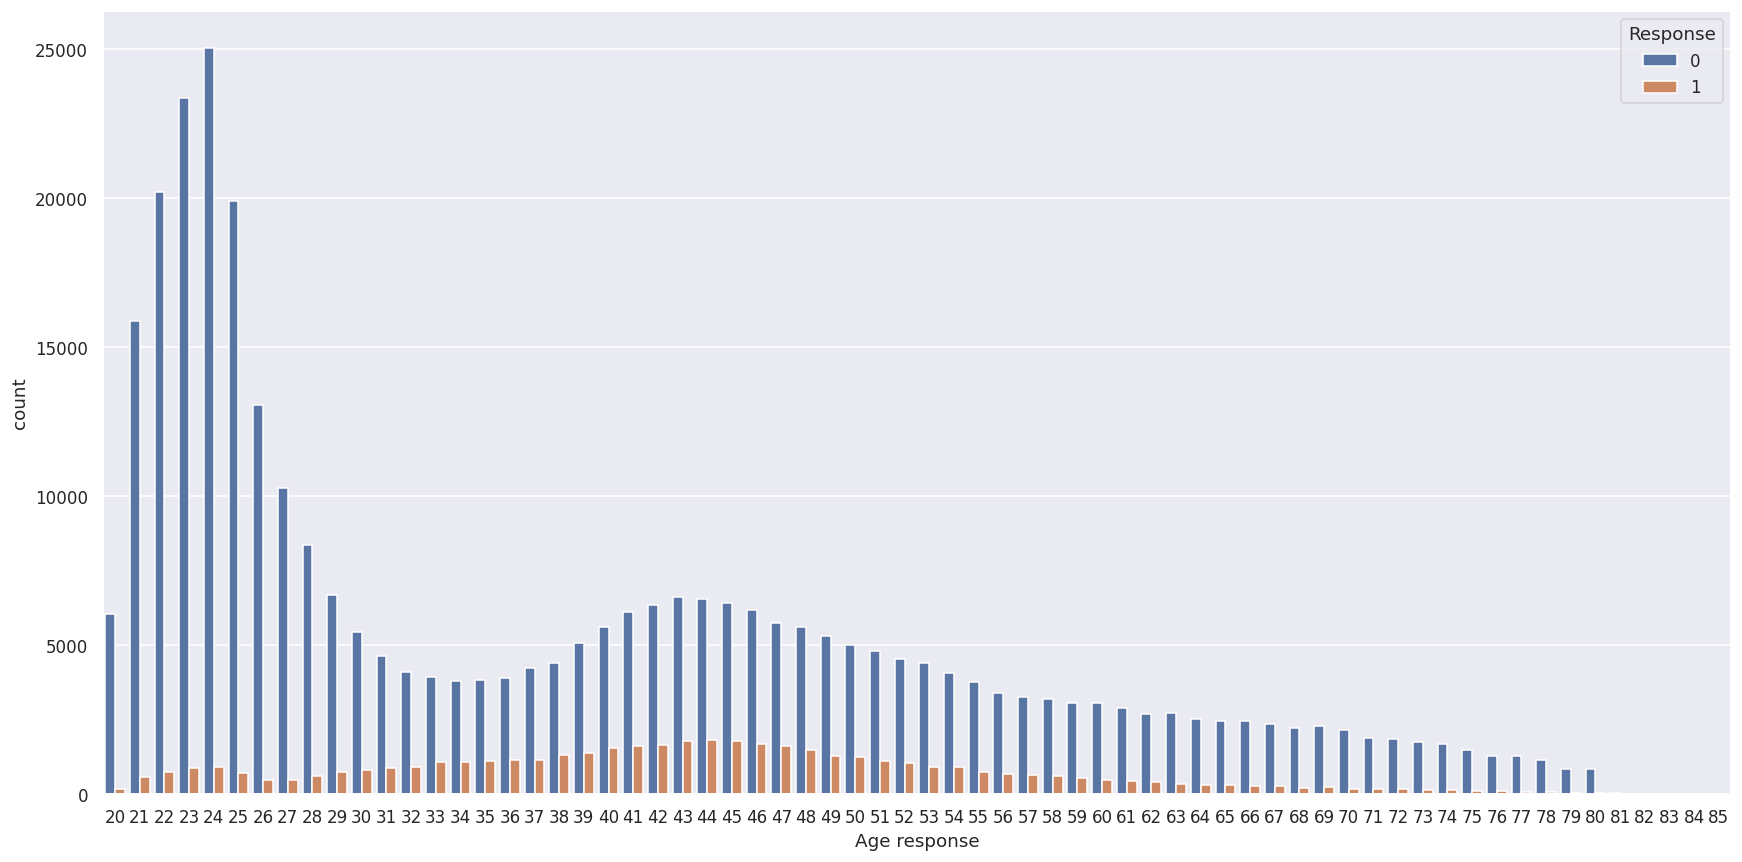

In [29]:
# Chart - 12 visualization code
plt.figure(figsize=(16,8),dpi = 110)
sns.countplot(data= Insurance_df, x='Age',hue='Response')
plt.xlabel('Age response')
plt.ylabel('count')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A count plot shows the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. That's why, to show the count of each category in a categorical variable, we used a count plot.

##### 2. What is/are the insight(s) found from the chart?

* Most people who are willing to purchase insurance are in the age group of 30 to 60.
* People who are in the age group of 20 to 30 are less interested in insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the count plot, we learned about the age group of customers who are interested in insurance. This information can help the company categorise their customers based on age and then make a business plan for the sale of insurance for each category.

#### Chart - 13

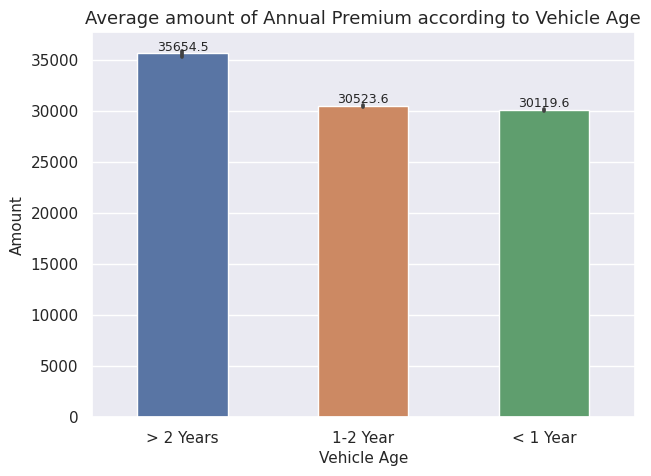

In [30]:
# Chart - 13 visualization code
fig, ax = plt.subplots(figsize=(7,5))
ax.patch.set_width(1)
ax = sns.barplot(data = Insurance_df,x = 'Vehicle_Age',y = 'Annual_Premium',width = 0.5)
ax.bar_label(ax.containers[0],fontsize = 9)
plt.title("Average amount of Annual Premium according to Vehicle Age",fontsize = 13)
plt.xlabel('Vehicle Age',fontsize = 11)
plt.ylabel('Amount',fontsize = 11)
plt.show()

##### 1. Why did you pick the specific chart?

Here, we used a bar chart because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* The average amount of the annual premium is highest for vehicles with a vehicle age of more than 2 years.
* The average amount of annual premium is approximately equal for vehicle ages between 1 and 2 years and less than 1 year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here, we have found that the average amount of premium is high for older vehicles. These insights will be helpful in deciding the amount of the annual premium based on the age of the car, and based on the average price, the customer can also decide whether to take insurance or not. So,this information will be helpful in improving the service provided by the company.

#### Chart - 14 - Correlation Heatmap

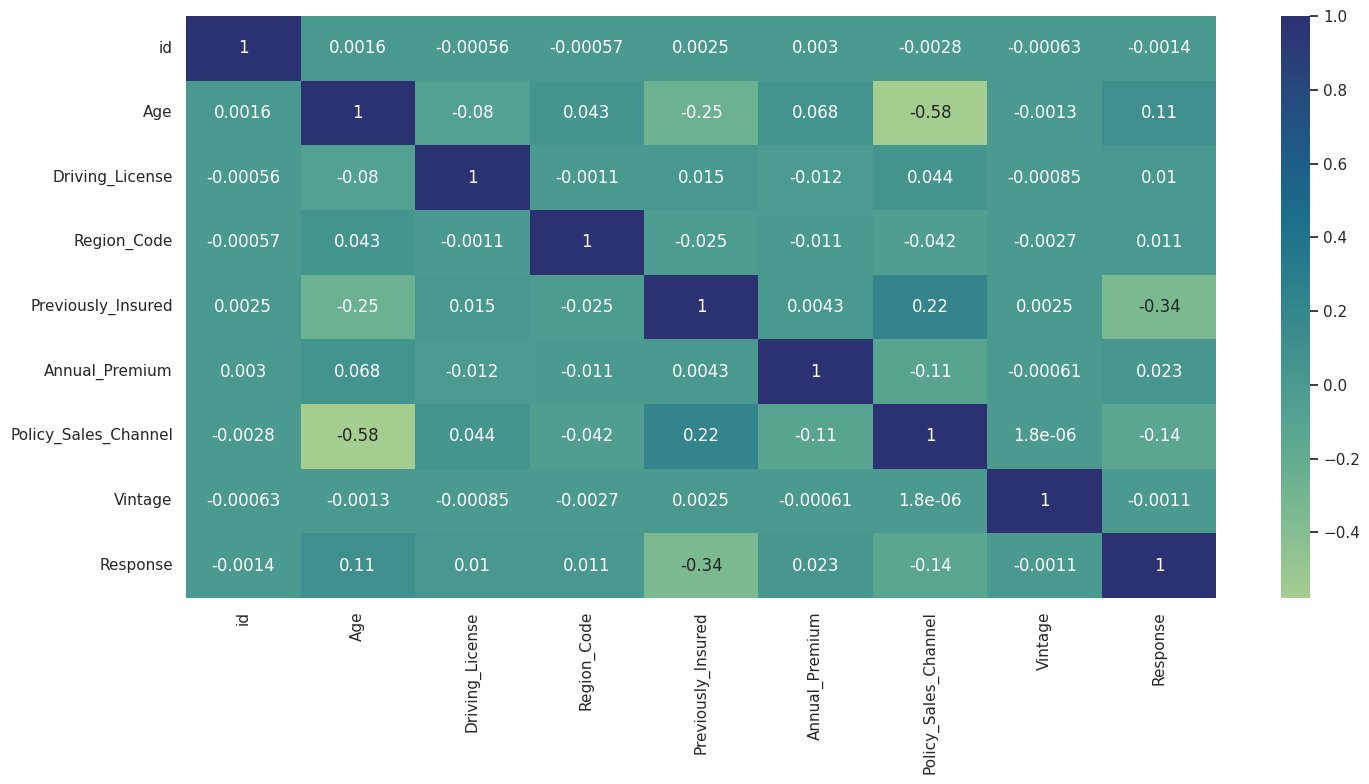

In [31]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
correlation = Insurance_df.corr()
sns.heatmap(correlation,annot=True,cmap ='crest')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information. So for the visualization of correlation values between different features,we used a heat map.

##### 2. What is/are the insight(s) found from the chart?

* The correlation among the features is less; currently,  there are no features that are highly correlated with each other.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

#### Statement - 1


* Null Hypothesis(H0) - There is no correlation between 'Response' and 'Annual_Premium' features.

* Alternate Hypothesis(Ha) - There is a correlation between 'Response' and 'Annual_Premium' features.


#### Statement - 2

* Null Hypothesis(H0) - There is no correlation between 'Age' and 'Response' features.

* Alternate Hypothesis(Ha) - There is a correlation between 'Age' and 'Response' features.


#### Statement - 3

* Null Hypothesis(H0) - 'Annual_Premium' feature follows Gaussian Distribution.

* Alternate Hypothesis(Ha) - 'Annual_Premium' feature does not follow Gaussian Distribution.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis(H0) - There is no correlation between 'Response' and 'Annual_Premium' features.

* Alternate Hypothesis(Ha) - There is a correlation between 'Response' and 'Annual_Premium' features.



#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
# Import pearson correlation coeff
from scipy.stats import pearsonr

x = Insurance_df['Annual_Premium']
y = Insurance_df['Response']
Statistics,p_value = pearsonr(x, y)
print('Statistics : %.3f' % Statistics)
print('p-value: %.2f' % p_value)

if p_value> 0.05:
    print('Test Result : Accept the Null Hypothesis')
else:
    print('Test Result : Reject the Null Hypothesis and accept the Alternative Hypothesis')

Statistics : 0.023
p-value: 0.00
Test Result : Reject the Null Hypothesis and accept the Alternative Hypothesis


##### Which statistical test have you done to obtain P-Value?

We used the Pearson Correlation test to calculate the P-Value as well as the Pearson Correlation coefficient value.It evaluates the linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We wanted to check the linear relationship between two variables, thats why we used this statistical test.The Pearson correlation coefficient measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis(H0) - There is no correlation between 'Age' and 'Response' features.

* Alternate Hypothesis(Ha) - There is a correlation between 'Age' and 'Response' features.


#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

# Import pearson correlation coeff
from scipy.stats import pearsonr

x = Insurance_df['Age']
y = Insurance_df['Response']
Statistics,p_value = pearsonr(x, y)
print('Statistics : %.3f' % Statistics)
print('p-value: %.2f' % p_value)

if p_value> 0.05:
    print('Test Result : Accept the Null Hypothesis')
else:
    print('Test Result : Reject the Null Hypothesis and accept the Alternative Hypothesis')

Statistics : 0.111
p-value: 0.00
Test Result : Reject the Null Hypothesis and accept the Alternative Hypothesis


##### Which statistical test have you done to obtain P-Value?

We used the Pearson Correlation test to calculate the P-Value as well as the Pearson Correlation coefficient value.It evaluates the linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We wanted to check the linear relationship between two variables, thats why we used this statistical test.The Pearson correlation coefficient measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis(H0) - 'Annual_Premium' feature follows Gaussian Distribution.

* Alternate Hypothesis(Ha) - 'Annual_Premium' feature does not follow Gaussian Distribution.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

# Import shapiro
from scipy.stats import shapiro

data = Insurance_df['Annual_Premium'].head(30000)
Statistics,p_value = shapiro(data)
print('Statistics: %.3f' % Statistics)
print('p-value: %.2f' % p_value)

if p_value> 0.05:
    print('Test Result : Accept the Null Hypothesis')
else:
    print('Test Result : Reject the Null Hypothesis and accept the Alternative Hypothesis')

Statistics: 0.890
p-value: 0.00
Test Result : Reject the Null Hypothesis and accept the Alternative Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Shapiro -Wilk test.The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution.

##### Why did you choose the specific statistical test?

Here, we want to check whether the sample is drawn from a Gaussian distribution or not, i.e., (The 'Annual_Premium' feature follows a Gaussian distribution or not).The Shapiro-Wilk test is considered to be a reliable test of normality thatswhy this statistical test has been used.

## ***6. Feature Engineering & Data Pre-processing***

In [35]:
# Before Starting Feature Engineering Let's make a copy of Original Dataset
df = Insurance_df.copy()

In [36]:
# Check the new dataframe
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


There are no null/missing values in our dataframe.

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no null/missing values in our dataframe.

### 2. Handling Outliers

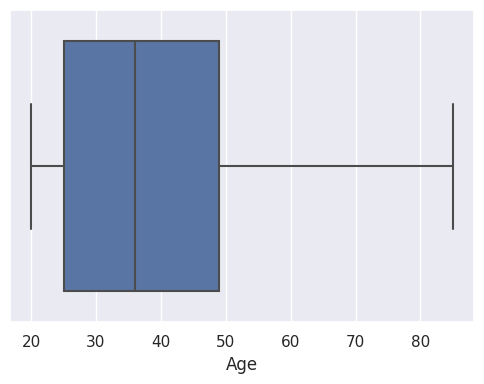

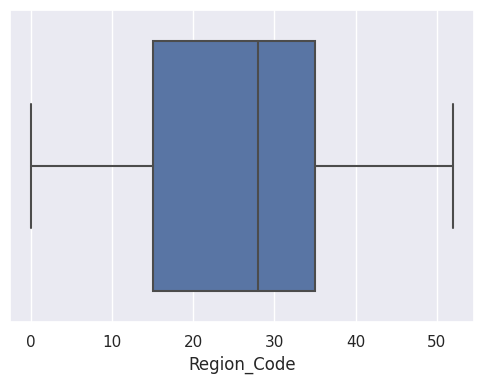

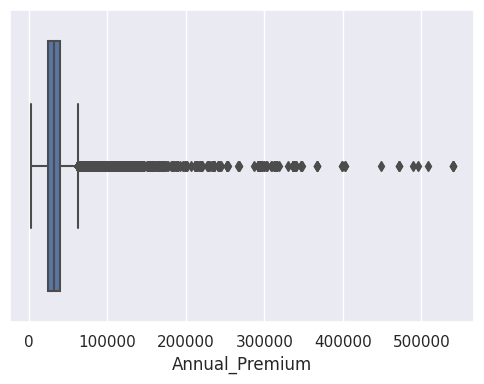

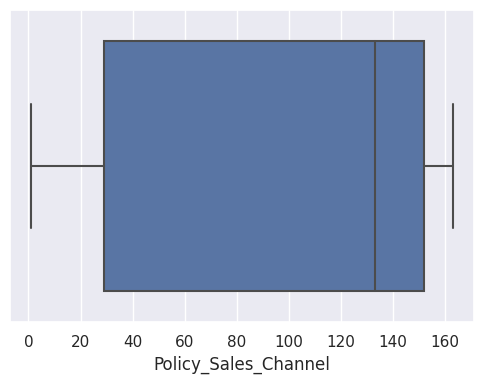

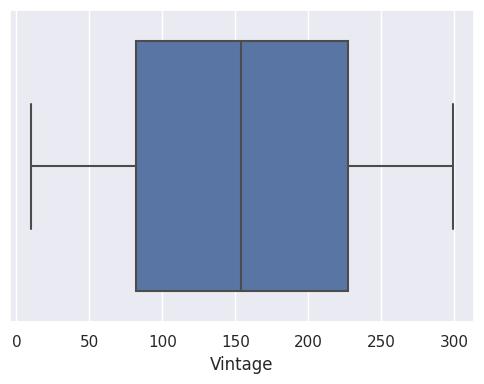

In [38]:
# Box Plot for the visualization of Outliers

# List of feature having continuous numerical values
num_features = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

# Visulization
for feature in num_features:
    plt.figure(figsize = (5,4) )
    sns.boxplot(data = df,x = feature)
    plt.tight_layout()

In [39]:
# Let's calculate the number of outliers in ecah column

# Define a function to find number of outliers for each column
def outliers_detection(dataframe,feature_list):
    for col_name in feature_list:
        quartile1 = dataframe[col_name].quantile(0.25)
        quartile3 = dataframe[col_name].quantile(0.75)
        iqr = quartile3 - quartile1
        upper_limit = quartile3 + 1.5 * iqr
        lower_limit = quartile1 - 1.5 * iqr
        outliers_count = (dataframe[(dataframe[col_name]>upper_limit)].shape[0])+(dataframe[(dataframe[col_name]<lower_limit)].shape[0])
        print(f"Column Name:{col_name}")
        print(f"Upper Limit:{upper_limit} , Lower Limit :{lower_limit}")
        print(f"Total Outliers Count:{outliers_count}\n\n")

In [40]:
outliers_detection(df,num_features)

Column Name:Age
Upper Limit:85.0 , Lower Limit :-11.0
Total Outliers Count:0


Column Name:Region_Code
Upper Limit:65.0 , Lower Limit :-15.0
Total Outliers Count:0


Column Name:Annual_Premium
Upper Limit:61892.5 , Lower Limit :1912.5
Total Outliers Count:10320


Column Name:Policy_Sales_Channel
Upper Limit:336.5 , Lower Limit :-155.5
Total Outliers Count:0


Column Name:Vintage
Upper Limit:444.5 , Lower Limit :-135.5
Total Outliers Count:0




There is only one feature that is 'Annual Premium' which has outliers.

In [41]:
# Define a function for handling outliers
def outliers_treatment(dataframe,col_name):
    quartile1 = dataframe[col_name].quantile(0.25)
    quartile3 = dataframe[col_name].quantile(0.75)
    iqr = quartile3 - quartile1
    upper_limit = (quartile3 + 1.5 * iqr)
    lower_limit = (quartile1 - 1.5 * iqr)
    dataframe.loc[dataframe[col_name] > upper_limit,col_name] = dataframe[col_name].quantile(0.90)
    dataframe.loc[dataframe[col_name] < lower_limit,col_name] = dataframe[col_name].quantile(0.10)
    dataframe[col_name] = dataframe[col_name].astype('int')
    return dataframe[col_name]

In [42]:
# Apply the function for handling outliers
for col_name in num_features:
    df[col_name] = outliers_treatment(df,col_name)

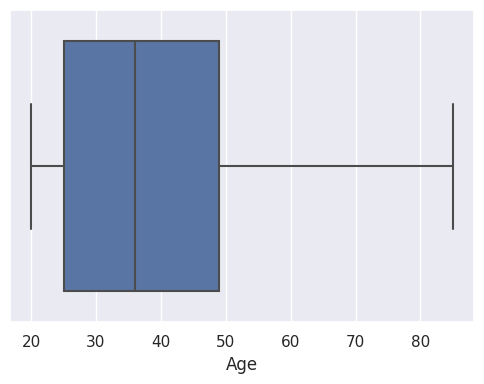

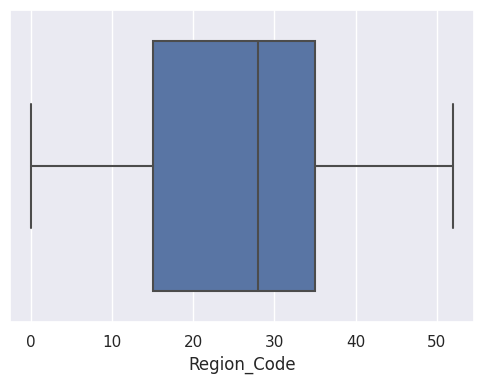

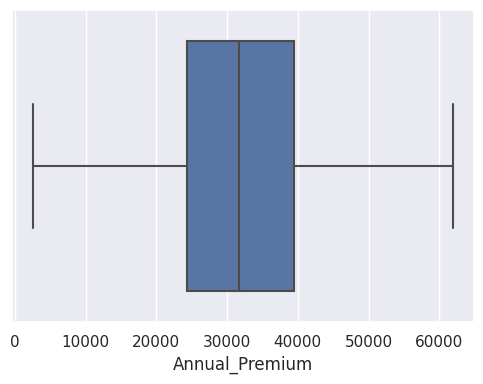

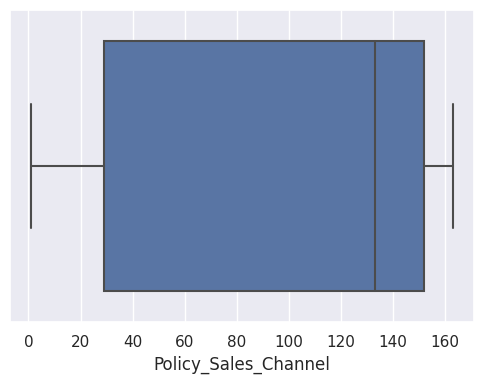

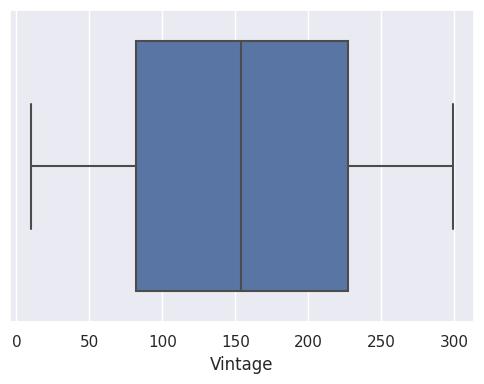

In [43]:
# Let's Check Again
for feature in num_features:
    plt.figure(figsize = (5,4) )
    sns.boxplot(data = df,x = feature)
    plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* First,we plotted the box plot for the visualisation of outliers and then defined a function that gives the total count of outliers for each numerical variable. We have found that there is only one feature, i.e., 'Annual Premium, that has outliers.


* As we know that 'Annual Premium' has Positively Skewed Distribution.So we can't apply the z-score method to treat outliers, that's why we have used IQR(Inter Quartile Range) method for the treatment of outliers.


* For calculating IQR, we need the 75th percentile and 25th percentile, where IQR is the difference between the 75th and 25th Quartile.


* The outliers that are lower than the lower limit have been replaced with the 10th percentile value, and those that are higher than the upper limit have been replaced with the 90th percentile value.


* After applying IQR, all outliers has been treated efficiently without losing any information.

### 3. Categorical Encoding

In [44]:
# Let's check datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


From the above information, it is clear that we have three categorical columns named 'Gender', 'Vehicle_Age', and 'Vehicle_Damage'.

In [45]:
# List of Categorical Features
categorical_features = ['Gender', 'Vehicle_Age','Vehicle_Damage']

# Check all the uniques within categorical variables
for i in categorical_features:
    print(f"Unique values in Column '{i}' is : {df[i].unique()}")

Unique values in Column 'Gender' is : ['Male' 'Female']
Unique values in Column 'Vehicle_Age' is : ['> 2 Years' '1-2 Year' '< 1 Year']
Unique values in Column 'Vehicle_Damage' is : ['Yes' 'No']


In [46]:
# Apply lable encoding to 'Vehicle damage' column
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace({'No':0,'Yes':1})
df['Gender'] = df['Gender'].replace({'Female':0,'Male':1})

In [47]:
# Apply One Hot encoding to the 'Gender' and 'Vehicle Age' column
df = pd.get_dummies(df,columns=['Vehicle_Age'])

In [48]:
# Let's check Dataframe
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28,0,1,40454,26,217,1,0,0,1
1,2,1,76,1,3,0,0,33536,26,183,0,1,0,0
2,3,1,47,1,28,0,1,38294,26,27,1,0,0,1
3,4,1,21,1,11,1,0,28619,152,203,0,0,1,0
4,5,0,29,1,41,1,0,27496,152,39,0,0,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

* We have used Label encoding for features 'Gender' and 'Vehicle_Damage' because both features have only two categories and we can simply replace one category with zero and the other one with 1.


* For feature 'Vehicle_Age' we have used One Hot Encoding because there are three distinct categories of Vehicle age.We could also use Lable encoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Manipulate Features to minimize feature correlation and create new features

In [49]:
# Let's drop unnecessary columns like 'id'
df.drop('id',inplace = True,axis = 1)

In [50]:
# Check dataframe again
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28,0,1,40454,26,217,1,0,0,1
1,1,76,1,3,0,0,33536,26,183,0,1,0,0
2,1,47,1,28,0,1,38294,26,27,1,0,0,1
3,1,21,1,11,1,0,28619,152,203,0,0,1,0
4,0,29,1,41,1,0,27496,152,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26,1,0,30170,26,88,0,1,0,0
381105,1,30,1,37,1,0,40016,152,131,0,0,1,0
381106,1,21,1,30,1,0,35118,160,161,0,0,1,0
381107,0,68,1,14,0,1,44617,124,74,0,0,0,1


#### 2. Feature Selection

Select your features wisely to avoid overfitting

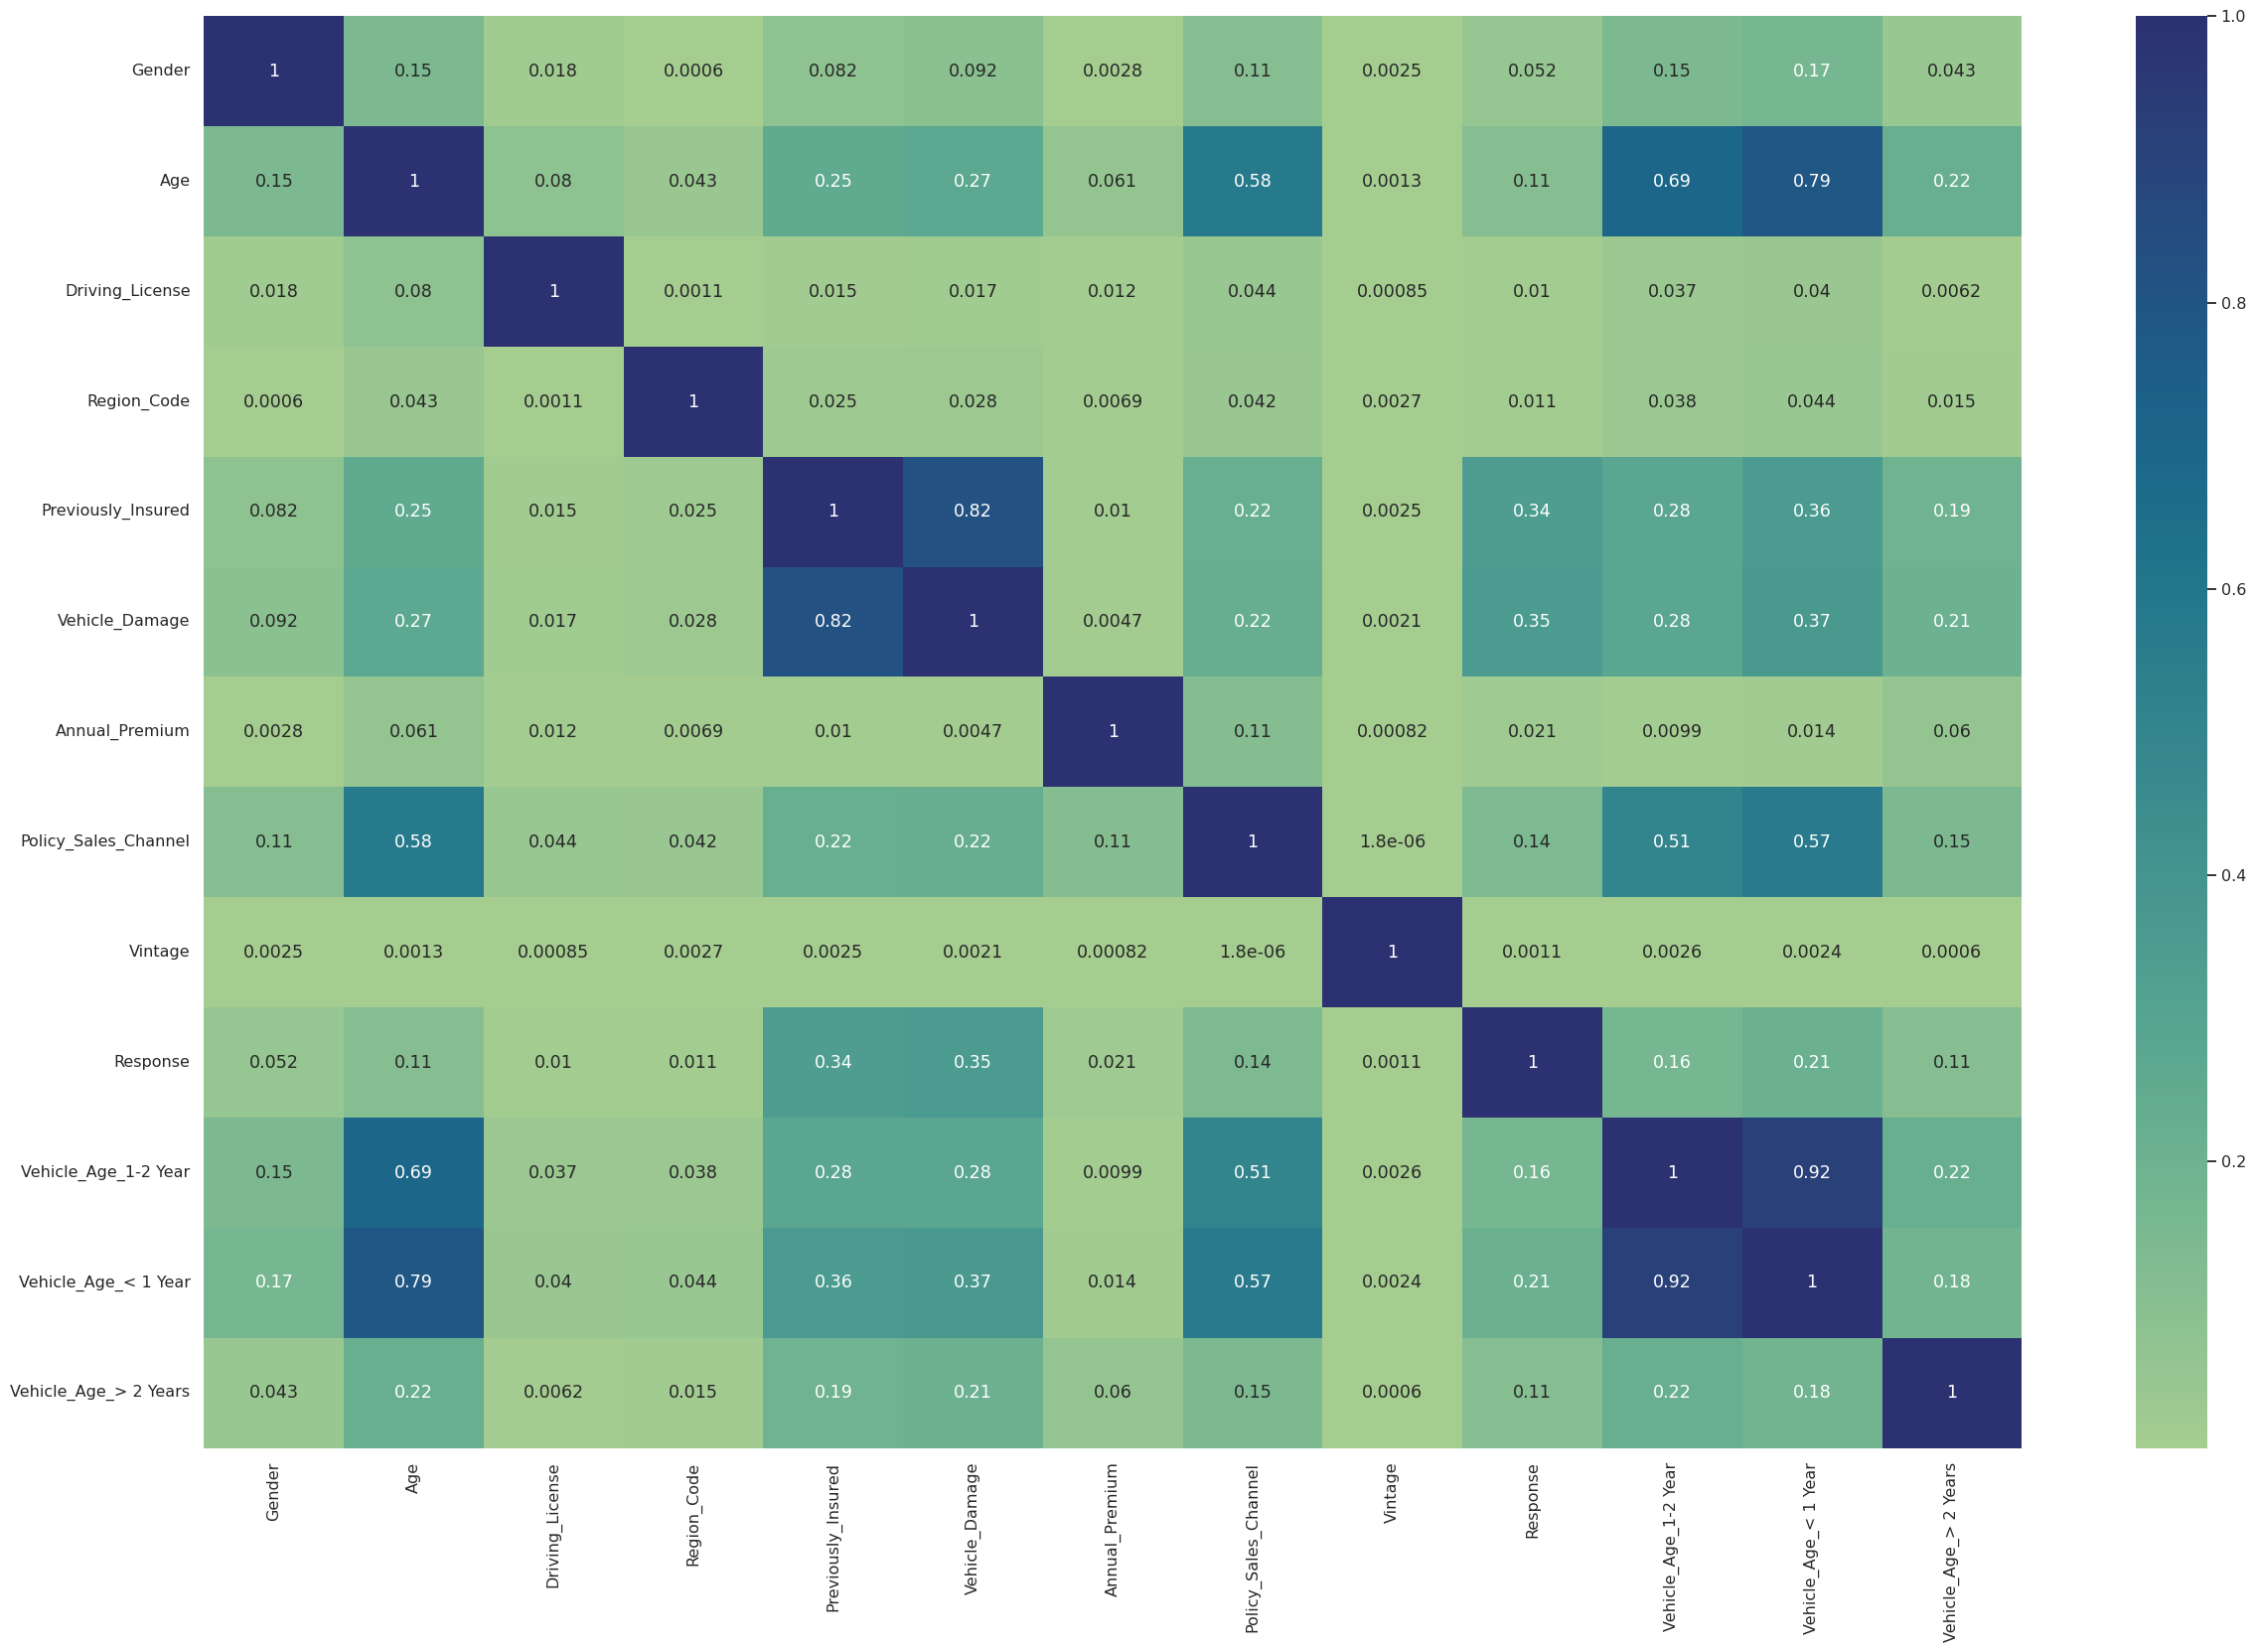

In [51]:
# correlation heatmap
plt.figure(figsize=(24,16),dpi = 105)
correlation = df.corr()
sns.heatmap(abs(correlation),annot=True,cmap ='crest')
plt.tight_layout()
plt.show()

In [52]:
# Multicollinearity check using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [53]:
# Calculating VIF by excluding Response
calc_vif(df[[feature for feature in df.columns if feature not in ['Response']]])

,variables,VIF
0,Gender,1.030599
1,Age,2.893237
2,Driving_License,1.008112
3,Region_Code,1.002821
4,Previously_Insured,3.157303
5,Vehicle_Damage,3.201909
6,Annual_Premium,1.023147
7,Policy_Sales_Channel,1.609817
8,Vintage,1.000028
9,Vehicle_Age_1-2 Year,290.274988


In [54]:
calc_vif(df[[feature for feature in df.columns if feature not in ['Response','Vehicle_Age_1-2 Year']]])

,variables,VIF
0,Gender,2.236712
1,Age,18.952244
2,Driving_License,54.241820
3,Region_Code,4.956282
4,Previously_Insured,5.750685
5,Vehicle_Damage,6.338887
6,Annual_Premium,5.087093
7,Policy_Sales_Channel,8.302734
8,Vintage,4.375084
9,Vehicle_Age_< 1 Year,5.148251


In [55]:
calc_vif(df[[feature for feature in df.columns if feature not in ['Response','Vehicle_Age_1-2 Year','Driving_License']]])

,variables,VIF
0,Gender,2.198265
1,Age,10.072216
2,Region_Code,4.663651
3,Previously_Insured,5.148011
4,Vehicle_Damage,5.400833
5,Annual_Premium,4.812337
6,Policy_Sales_Channel,6.771355
7,Vintage,4.164635
8,Vehicle_Age_< 1 Year,4.151509
9,Vehicle_Age_> 2 Years,1.125105


In [56]:
# Final dataframe with selected Features
df = df[[feature for feature in df.columns if feature not in ['Vehicle_Age_1-2 Year','Driving_License']]]
df.head(5)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,28,0,1,40454,26,217,1,0,1
1,1,76,3,0,0,33536,26,183,0,0,0
2,1,47,28,0,1,38294,26,27,1,0,1
3,1,21,11,1,0,28619,152,203,0,1,0
4,0,29,41,1,0,27496,152,39,0,1,0


In [57]:
df.columns

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

##### What all feature selection methods have you used  and why?

We have used correlation coefficient matrix to select the features so that we can select only those features that don't possess multicollinearity, and along with the correlation coefficient, we have also used Variance Inflation Factor for better selection.

##### Which all features you found important and why?

* We have found a list of 11 important features after removing multicollinearity by performing VIF analysis.


* **Selected features are :** 'Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage','Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response','Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'

       
* Here, we have calculated the VIF factor for each variable and removed those that have high values of VIF and only kept those that have VIF values close to 5 or less than 5.


* We have removed some features like 'Vehicle_Age_1-2 Year' and 'Driving_License' because they bring multicollinearity to the analysis.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

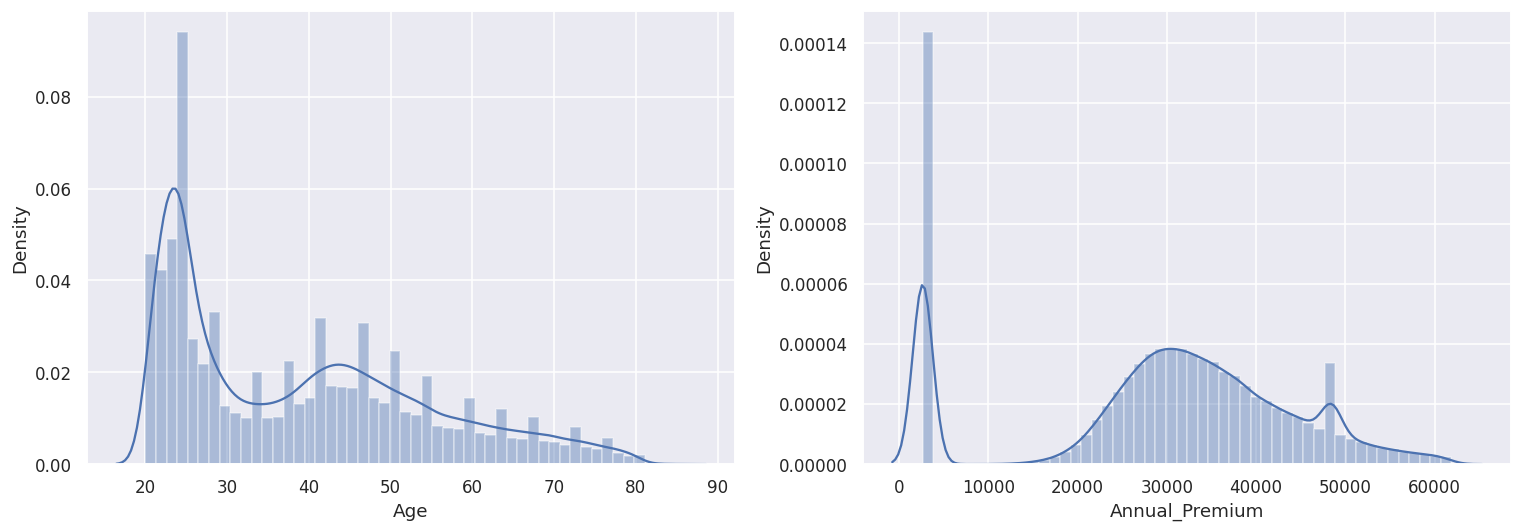

In [58]:
# Transform Your data

# Again check the distribution of 'Age' and 'Annual_Premium'
fig,ax = plt.subplots(1,2,figsize = (14,5),dpi = 110)
sns.distplot(df['Age'],ax = ax[0])
sns.distplot(df['Annual_Premium'],ax = ax[1])
plt.tight_layout()
plt.show()

In [59]:
# Create a function to plot Distribution plots and  Q-Q plot

# import required libraries
import scipy.stats as stat
import pylab

# function
def normality_check(data,feature):
    fig,ax = plt.subplots(2,3,figsize = (16,8),dpi = 110)
    sns.distplot(data[feature],ax = ax[0][0])
    ax[0][0].set_title('Distributuion of ' + feature)
    sns.distplot(np.sqrt(data[feature]),ax = ax[0][1])
    ax[0][1].set_title('Distributuion of '+ feature + ' after Square Root Transformation')
    sns.distplot(np.log(data[feature]+1),ax = ax[0][2])
    ax[0][2].set_title('Distributuion of '+ feature + ' after Log Transformation')
    stat.probplot(data[feature],dist='norm',plot=ax[1][0])
    ax[1][0].set_title('Q-Q plot for ' + feature)
    stat.probplot(np.sqrt(data[feature]),dist='norm',plot=ax[1][1])
    ax[1][1].set_title('Q-Q plot for '+ feature + ' after Square Root Transformation')
    stat.probplot(np.log(data[feature]+1),dist='norm',plot=ax[1][2])
    ax[1][2].set_title('Q-Q plot for '+ feature + ' after Log Transformation')
    plt.tight_layout()
    plt.show()

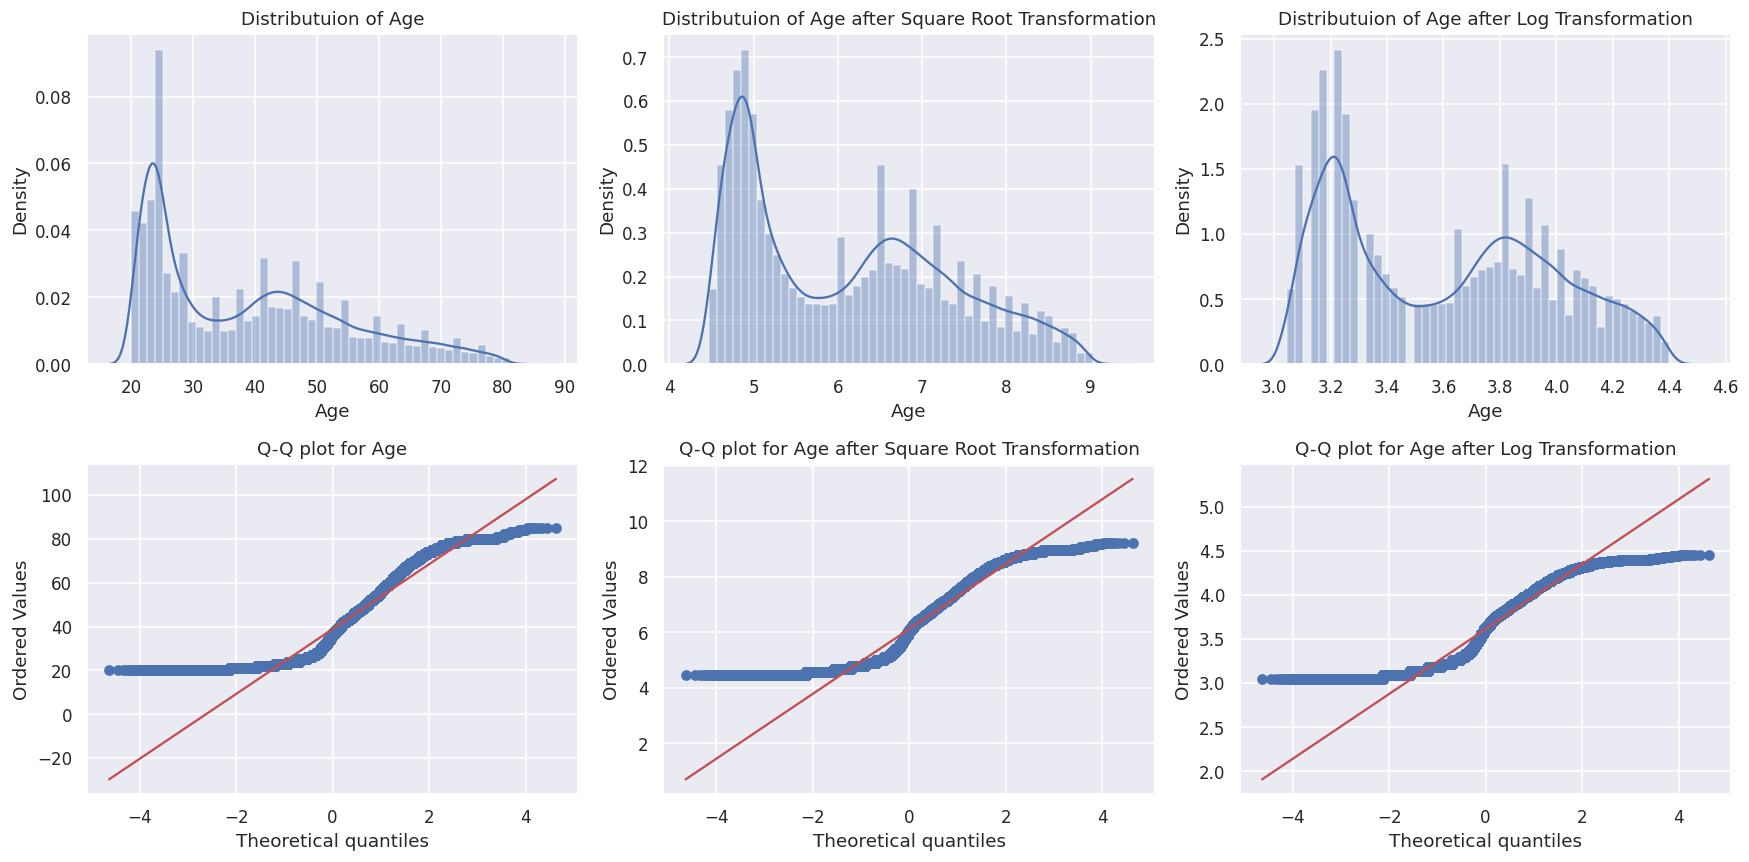

In [60]:
# Check transformation for 'Age' column
normality_check(df,'Age')

From the above Q-Q plots, it is clear that for 'Log Transformation' of feature 'Age' most of the points lie on a straight line. That's why we will apply the  Log transformation to the 'Age' column.

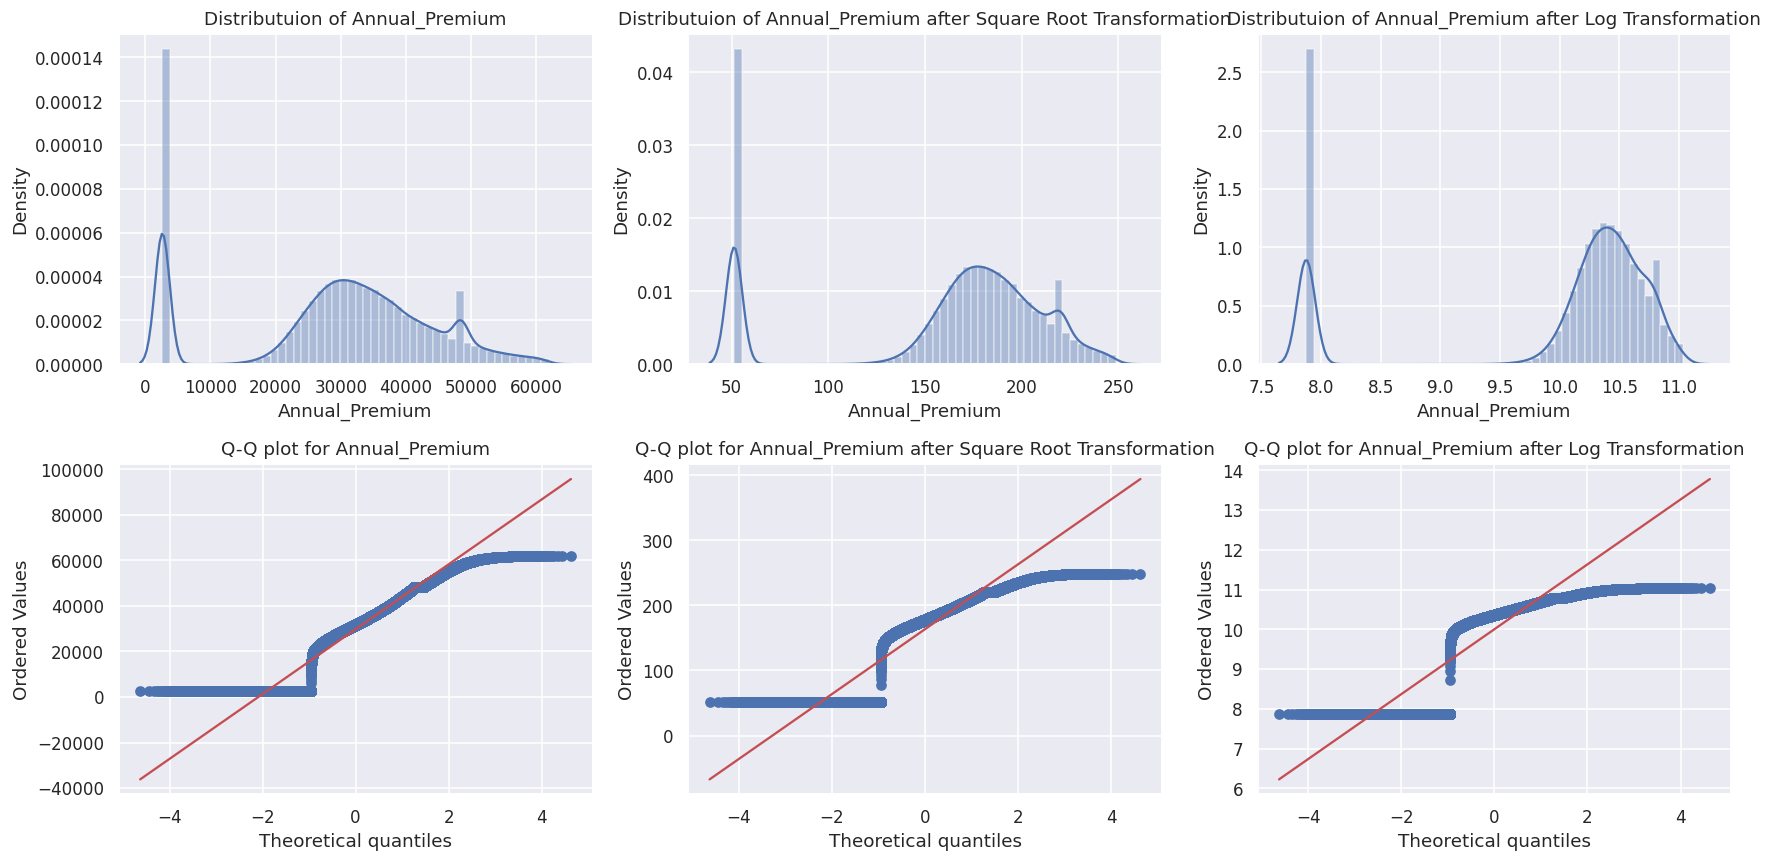

In [61]:
# Check transformation for 'Annual_Premium' column
normality_check(df,'Annual_Premium')

For feature 'Annual_Premium' no transformation is needed because for the Q-Q plot, most of the points already lie on a straight line.

In [62]:
# Let's apply transformation to the columns
df['Age'] = np.log(df['Age']+1)

### 6. Data Splitting


In [63]:
# Dependent and Independent Features
X = df.drop('Response',axis = 1)
Y = df['Response']

In [64]:
# Let's check dependent variable dataframe
X.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,3.806662,28,0,1,40454,26,217,0,1
1,1,4.343805,3,0,0,33536,26,183,0,0
2,1,3.871201,28,0,1,38294,26,27,0,1
3,1,3.091042,11,1,0,28619,152,203,1,0
4,0,3.401197,41,1,0,27496,152,39,1,0


In [65]:
# Split your data to train and test. Choose Splitting ratio wisely.

# import train test split from sklearn
from sklearn.model_selection import train_test_split

# perform train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0,stratify = Y)

In [66]:
# Shape train and test set
print(f"Shape of Train Data - 'X_train Shape' : {X_train.shape}")
print('\n')
print(f"Shape of Train Data - 'X_test Shape' : {X_test.shape}")

Shape of Train Data - 'X_train Shape' : (304887, 10)


Shape of Train Data - 'X_test Shape' : (76222, 10)


In [67]:
# Value counts of Dependent feature Y

print('Value Count in Train Data ')
print(Y_train.value_counts())
print('\n')
print('Value Count in Test Data')
print(Y_test.value_counts())

Value Count in Train Data 
0    267519
1     37368
Name: Response, dtype: int64


Value Count in Test Data
0    66880
1     9342
Name: Response, dtype: int64


##### What data splitting ratio have you used and why?

Since the dataset is huge, we have used 80-20 split for our model. We have assigned 80% of the data to the training set and 20% to the test. Here, random state = 0 is used because we want our algorithm to produce the same results every time we run it.We have also used the stratify parameter to ensure that the distribution of minority classes will be the same in training and test data.

### 7. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

We have already found from the percentage distribution of the target variable that there are 87.7 percent of people who are not interested in vehicle insurance, and only 12.3 percent are interested. This shows that the response variable is heavily imbalanced.

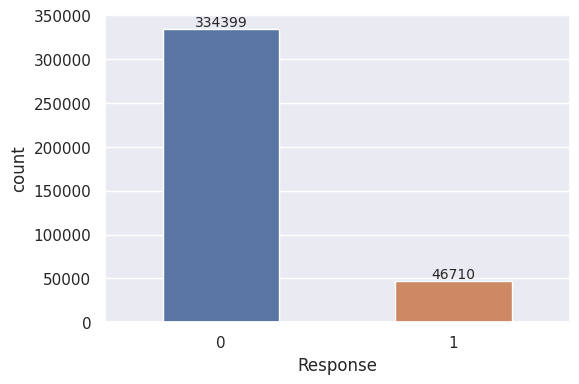

In [68]:
# Display the count of values in target variable
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(data = df,x = 'Response',width = 0.5)
ax.bar_label(ax.containers[0],fontsize = 10)
plt.show()

There are 33,4399 zeros, and only 46,710 are ones in the dataset.

In [69]:
# Let's check train dataset
Y_train.value_counts()

0    267519
1     37368
Name: Response, dtype: int64

##### Apply Sampling Technique to Handle Imbalanced Dataset



We will apply the sampling technique only to train data because if we apply it to the whole data set, the model would also perform well on sampled data but not on original data. That's why we have kept separate test data, which is not resampled by any technique.

In [70]:
# Handling Imbalanced Dataset

# Import required Libraries
from imblearn.over_sampling import RandomOverSampler

random_sampler = RandomOverSampler(random_state= 0)


# fit predictor and target variable
X_train_res, Y_train_res = random_sampler.fit_resample(X_train, Y_train)  # resampled train data

In [71]:
# let's check
print('Value Count in Train Data Before Handling Class Imbalance')
print(Y_train.value_counts())
print('\n')
print('Value Count in Train Data After Handling Class Imbalance')
print(Y_train_res.value_counts())

Value Count in Train Data Before Handling Class Imbalance
0    267519
1     37368
Name: Response, dtype: int64


Value Count in Train Data After Handling Class Imbalance
0    267519
1    267519
Name: Response, dtype: int64


Now both values in the response feature are comparable in the training data.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* Sometimes, when the records of a certain class are much higher than the other class, our classifier may get biased towards the prediction. In this case, even after having the good accuracy model fails to identify the minority class. Thus, our traditional approach of classification and model accuracy calculation is not useful in the case of an imbalanced dataset.  That's why we need to balance the data using different techniques.


* Here,to overcome class imbalance, we have used the Random Oversampling technique.Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.


* We could use SMOTE, but this technique has a drawback. It creates a large number of noisy points, which is why it is not effective for large datasets.

### 8. Data Scaling

In [72]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_res=scaler.fit_transform(X_train_res)
X_test=scaler.transform(X_test)

##### Which method have you used to scale you data and why?

* Scaling is done to ensure that all features contribute equally to the model and to prevent features with larger values from dominating the model.These techniques can help to improve model performance, reduce the impact of outliers, and ensure that the data is on the same scale.


* We have used the Standard Scaler for scaling train and test data. In Standard scaling method, all the values are centered around the mean with a unit standard deviation. A standard scalar has been used because we want our data to have a gaussian distribution because we are going to use an algorithm like logistic regression. Also, algorithms that use distance measures between examples are affected by the scale of the data, such as k-nearest neighbours.

## ***7. ML Model Implementation***

### ML Model - 1

### Logistic Regression

In [73]:
# import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import classification_report

In [74]:
# Define a Function for calculating Evaluation metrics

from prettytable import PrettyTable
def evaluationmetrics(y_train,y_test,y_train_pred,y_test_pred):
    Accuracy_train  = round(accuracy_score(y_train,y_train_pred),3)
    Accuracy_test  = round(accuracy_score(y_test,y_test_pred),3)
    Precision_train = round(precision_score(y_train,y_train_pred),3)
    Precision_test = round(precision_score(y_test,y_test_pred),3)
    Recall_train = round(recall_score(y_train,y_train_pred),3)
    Recall_test = round(recall_score(y_test,y_test_pred),3)
    F1_score_train = round((f1_score(y_train,y_train_pred)),3)
    F1_score_test = round((f1_score(y_test,y_test_pred)),3)
    roc_auc_score_train = round((roc_auc_score(y_train,y_train_pred)),3)
    roc_auc_score_test = round((roc_auc_score(y_test,y_test_pred)),3)
    metrics = PrettyTable(['Evaluation Metrics','Results On Train Data','Results On Test Data'])
    metrics.add_row(['Accuracy Score',Accuracy_train,Accuracy_test])
    metrics.add_row(['Precision Score',Precision_train,Precision_test])
    metrics.add_row(['Recall Score',Recall_train,Recall_test])
    metrics.add_row(['f1 Score',F1_score_train,F1_score_test])
    metrics.add_row(['Roc Auc Score',roc_auc_score_train,roc_auc_score_test])
    return print(metrics)

In [75]:
def results_visualization(y_test,y_test_pred,model):

    # Figure Sizing
    fig = plt.figure(figsize=(15, 5),dpi = 110)
    plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
    spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[1,1.5])

    # Plot -1 Confusion Matrix
    sub1 = fig.add_subplot(spec[0])

    # Get the confusion matrix for  train data
    cm = confusion_matrix(y_test,y_test_pred)

    # plot using heatmap
    sns.heatmap(cm, annot=True,fmt='g',cmap = 'crest',ax = sub1,cbar = False)
    sub1.set_xlabel('Predicted labels',fontsize = 13)
    sub1.set_ylabel('True labels',fontsize = 13)
    sub1.set_title('Confusion Matrix',fontsize = 14)


    # Plot -2 ROC Curve
    sub2 = fig.add_subplot(spec[1])

    # Calculate False positive rate,True Positive Rate and Thresholds
    fpr, tpr,thresholds = roc_curve(y_test,y_test_pred)

    # Calculate Area Under Curve
    roc_auc = auc(fpr, tpr)
    label = model + f"(AUC = {round(roc_auc,3)})"

    # Plot the ROC curve
    plt.plot(fpr,tpr, label = label)
    plt.plot((0,1), linestyle='--',color='black')
    plt.fill_between(fpr, tpr,alpha = 0.2)
    plt.title("ROC Curve"+ " (Model = " + model +")",fontsize = 14)
    plt.xlabel('False Positive Rate',fontsize = 13)
    plt.ylabel('True Positive Rate',fontsize = 13)
    plt.legend(loc = 'lower right',fontsize = 12)
    plt.show()


In [76]:
# ML Model - 1 Implementation
logistic_regressor = LogisticRegression(fit_intercept = True,max_iter = 10000,random_state = 0)

# Fit the Algorithm
logistic_regressor.fit(X_train_res,Y_train_res)

# Predict on the model
Y_train_pred_logistic = logistic_regressor.predict(X_train_res)
Y_test_pred_logistic = logistic_regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Evaluation Metrics For Train and Test data
evaluationmetrics(Y_train_res,Y_test,Y_train_pred_logistic,Y_test_pred_logistic)

+--------------------+-----------------------+----------------------+
| Evaluation Metrics | Results On Train Data | Results On Test Data |
+--------------------+-----------------------+----------------------+
|   Accuracy Score   |         0.782         |         0.64         |
|  Precision Score   |         0.705         |         0.25         |
|    Recall Score    |         0.972         |         0.97         |
|      f1 Score      |         0.817         |        0.398         |
|   Roc Auc Score    |         0.782         |        0.782         |
+--------------------+-----------------------+----------------------+


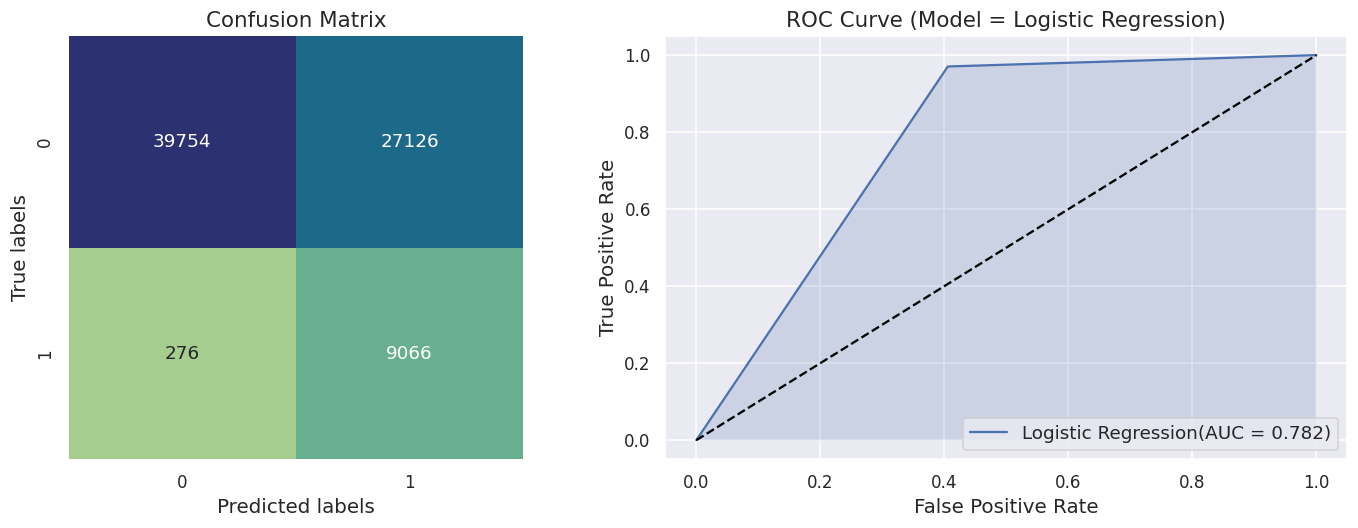

In [78]:
# Confusion matrix and ROC curve for test data
results_visualization(Y_test,Y_test_pred_logistic,'Logistic Regression')

* The first model that we have used is Logistic Regression, which gives good results on test data. The above visualisation shows the confusion matrix and ROC curve for the logistic regression. Our model gives a recall of 0.97 on unseen data,which means it is able to identify 97 percent of potentially interested customers.


* The model gives a precision score of 0.25, which means that out of all predicted interested customers, only 25 percent are actually interested. Although our model captures a lot of false positives, which means precision is very low, here our target is to identify all those who are actually interested, and our model does this job very effectively because of its high recall.


* In our case, Recall is more important than precision because if recall is low and precision is high, then our model fails to capture all those customers who are actually interested in insurance, which is a loss to the company in terms of money. Whereas if recall is high and precision is low, we will be able to target those who are actually interested, but since precision is low, there are lots of customers who are not interested but are identified as interested, which will lead to time and resuource losses for the company. But it is clear for the company True positive rate is more important than False positive rate.


* The other graph is of Receiver operating characteristic (ROC), which gives the area between True Positive and False Positive and the value of the area under the curve is 0.782.


* Further, we will try to improve the model using hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# Import Required Libraries
from sklearn.model_selection import GridSearchCV

In [80]:
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
classifier = LogisticRegression()
parameters = {'max_iter':[10000,12000], 'penalty':['l1', 'l2', 'elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
logistic_regression_cv = GridSearchCV(classifier, parameters, scoring='recall', cv=5,n_jobs = -1)

# Fit the Algorithm
logistic_regression_cv.fit(X_train_res,Y_train_res)


# Predict on the model
Y_train_pred_logistic_cv = logistic_regression_cv.predict(X_train_res)
Y_test_pred_logistic_cv = logistic_regression_cv.predict(X_test)

# Best parameters
print("The best parameters are found out to be :" ,logistic_regression_cv.best_params_)
print("\nUsing these parameters the Recall is: ", logistic_regression_cv.best_score_)


The best parameters are found out to be : {'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}

Using these parameters the Recall is:  0.9717814485758165


##### Which hyperparameter optimization technique have you used and why?

* Here, GridSearchCV has been used for the optimization of hyperparameters. Grid Search uses a different combination of all the specified hyperparameters and their values, calculates the performance for each combination, and selects the best value for the hyperparameters.


* If we have too many parameters to tune, then it is not a good idea to go with GridSearchCV, but in our case, there are only a few parameters, i.e., 'max_iter', 'penalty' and 'solver', that need to be tuned. So, we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [81]:
evaluationmetrics(Y_train_res,Y_test,Y_train_pred_logistic_cv,Y_test_pred_logistic_cv)

+--------------------+-----------------------+----------------------+
| Evaluation Metrics | Results On Train Data | Results On Test Data |
+--------------------+-----------------------+----------------------+
|   Accuracy Score   |         0.782         |         0.64         |
|  Precision Score   |         0.705         |         0.25         |
|    Recall Score    |         0.972         |         0.97         |
|      f1 Score      |         0.817         |        0.398         |
|   Roc Auc Score    |         0.782         |        0.782         |
+--------------------+-----------------------+----------------------+


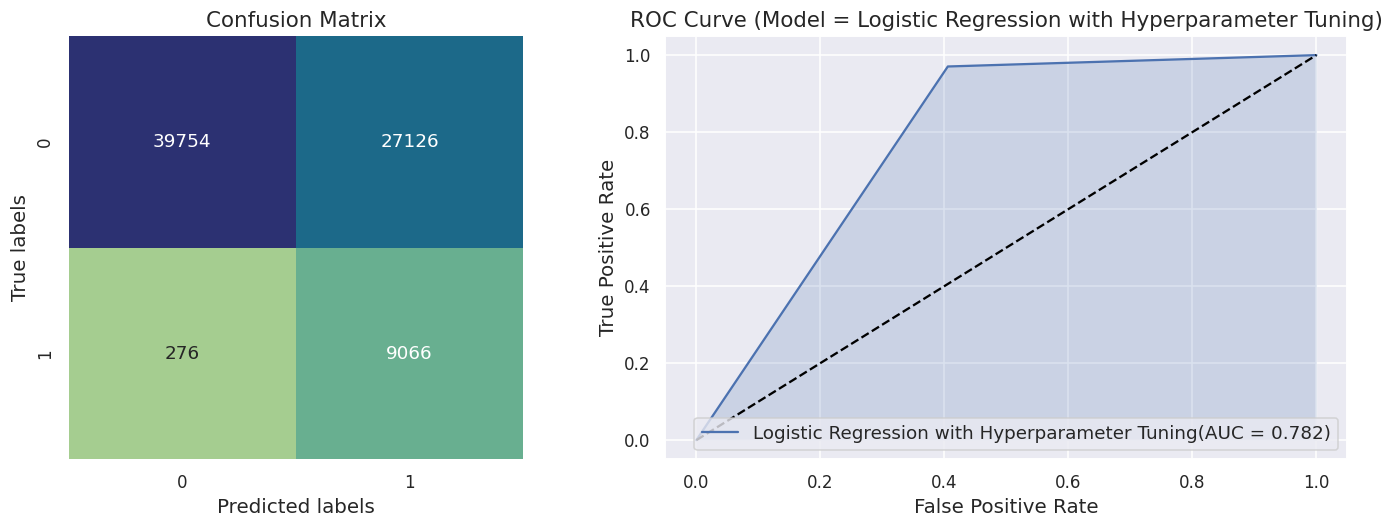

In [82]:
results_visualization(Y_test,Y_test_pred_logistic_cv,'Logistic Regression with Hyperparameter Tuning')

There is no improvement in the current model, our model already performed well. The values of Recall and ROC AUC Score are the same as before.

### ML Model - 2

###  Decision Tree

In [83]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier

In [84]:
# ML Model - 2 Implementation
decisiontree_classifier = DecisionTreeClassifier(max_depth = 6, random_state=0,max_features = 0.8)

# Fit the Algorithm
decisiontree_classifier.fit(X_train_res,Y_train_res)

# Predict on the model
Y_train_pred_dt = decisiontree_classifier.predict(X_train_res)
Y_test_pred_dt = decisiontree_classifier.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# Evaluation Metrics For Train and Test data
evaluationmetrics(Y_train_res,Y_test,Y_train_pred_dt,Y_test_pred_dt)

+--------------------+-----------------------+----------------------+
| Evaluation Metrics | Results On Train Data | Results On Test Data |
+--------------------+-----------------------+----------------------+
|   Accuracy Score   |         0.795         |        0.689         |
|  Precision Score   |          0.73         |        0.274         |
|    Recall Score    |         0.938         |        0.932         |
|      f1 Score      |         0.821         |        0.424         |
|   Roc Auc Score    |         0.795         |        0.793         |
+--------------------+-----------------------+----------------------+


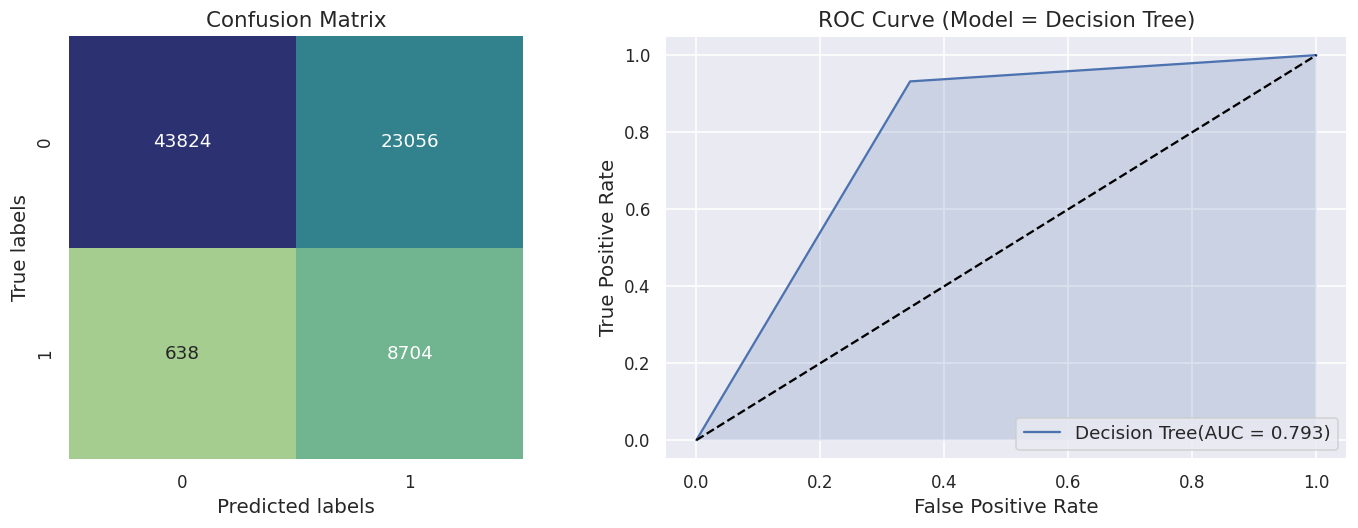

In [86]:
# Confusion matric and ROC curve for test data
results_visualization(Y_test,Y_test_pred_dt,'Decision Tree')

* Decision Tree gives a recall value of 0.932 on test data, which means it is able to identify 93.2 percent of interested customers correctly. The precision value is 0.274 and the ROC AUC score is 0.739.


* This model also performs well on test data but not better than Logistic regression, which gives a recall value of 0.97.


* Now, we will try to improve the current model using Hyperparameter Tuning and see if the model's performance improves or not.

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# Import Required Libraries
from sklearn.model_selection import GridSearchCV

In [88]:
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
classifier = DecisionTreeClassifier(random_state=0)
parameters = {'max_depth': [4,5,6,7], 'max_features':[0.5,0.6,0.7,0.8]}
decisiontree_classifier_cv = GridSearchCV(classifier, parameters, scoring='recall', cv=5,n_jobs = -1)

# Fit the Algorithm
decisiontree_classifier_cv.fit(X_train_res,Y_train_res)

# Predict on the model
Y_train_pred_dt_cv = decisiontree_classifier_cv.predict(X_train_res)
Y_test_pred_dt_cv = decisiontree_classifier_cv.predict(X_test)

# Best parameters
print("The best parameters are found out to be :" ,decisiontree_classifier_cv.best_params_)
print("\nUsing these parameters the Recall is: ", decisiontree_classifier_cv.best_score_)

The best parameters are found out to be : {'max_depth': 5, 'max_features': 0.6}

Using these parameters the Recall is:  0.9735794493888552


##### Which hyperparameter optimization technique have you used and why?

* Here, GridSearchCV has been used for the optimization of hyperparameters. Grid Search uses a different combination of all the specified hyperparameters and their values, calculates the performance for each combination, and selects the best value for the hyperparameters.


* If we have too many parameters to tune, then it is not a good idea to go with GridSearchCV, but here we only need to tune 'max_depth' and 'max_feature', which can be easily tuned by GridsearchCV. So for this reason, we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [89]:
# Evaluation Metrics For Train and Test data
evaluationmetrics(Y_train_res,Y_test,Y_train_pred_dt_cv,Y_test_pred_dt_cv)

+--------------------+-----------------------+----------------------+
| Evaluation Metrics | Results On Train Data | Results On Test Data |
+--------------------+-----------------------+----------------------+
|   Accuracy Score   |         0.791         |        0.654         |
|  Precision Score   |         0.713         |        0.258         |
|    Recall Score    |         0.973         |         0.97         |
|      f1 Score      |         0.823         |        0.408         |
|   Roc Auc Score    |         0.791         |         0.79         |
+--------------------+-----------------------+----------------------+


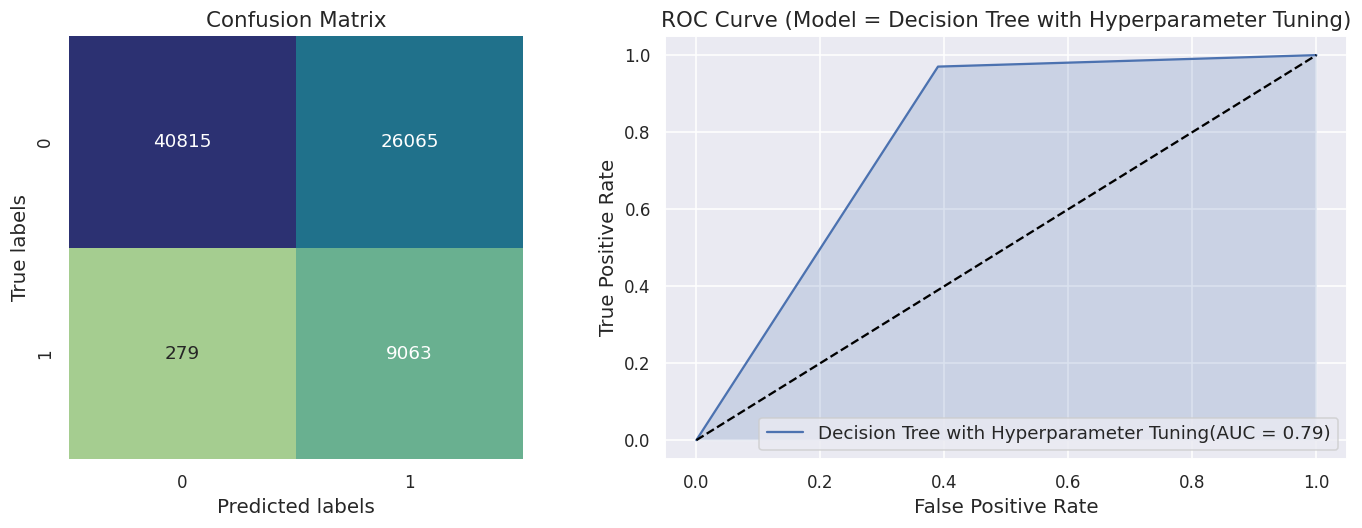

In [90]:
# Confusion matrix and ROC curve for test data
results_visualization(Y_test,Y_test_pred_dt_cv,'Decision Tree with Hyperparameter Tuning')

After performing the hyperparameter tuning, the recall value decreases and the number of false negatives increases significantly. So, there is no advantage that we have gained by using hyperparameter tuning.

### ML Model - 3

### Random Forest

In [91]:
# Import required Libraries
from sklearn.ensemble import RandomForestClassifier

In [92]:
# ML Model - 3 Implementation
randomforest_classifier = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth = 4,random_state=0,max_features = None)


# Fit the Algorithm
randomforest_classifier.fit(X_train_res,Y_train_res)

# Predict on the model
Y_train_pred_rf = randomforest_classifier.predict(X_train_res)
Y_test_pred_rf = randomforest_classifier.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [93]:
# Evaluation Metrics For Train and Test data
evaluationmetrics(Y_train_res,Y_test,Y_train_pred_rf,Y_test_pred_rf)

+--------------------+-----------------------+----------------------+
| Evaluation Metrics | Results On Train Data | Results On Test Data |
+--------------------+-----------------------+----------------------+
|   Accuracy Score   |          0.79         |        0.656         |
|  Precision Score   |         0.714         |        0.258         |
|    Recall Score    |         0.969         |        0.964         |
|      f1 Score      |         0.822         |        0.408         |
|   Roc Auc Score    |          0.79         |        0.789         |
+--------------------+-----------------------+----------------------+


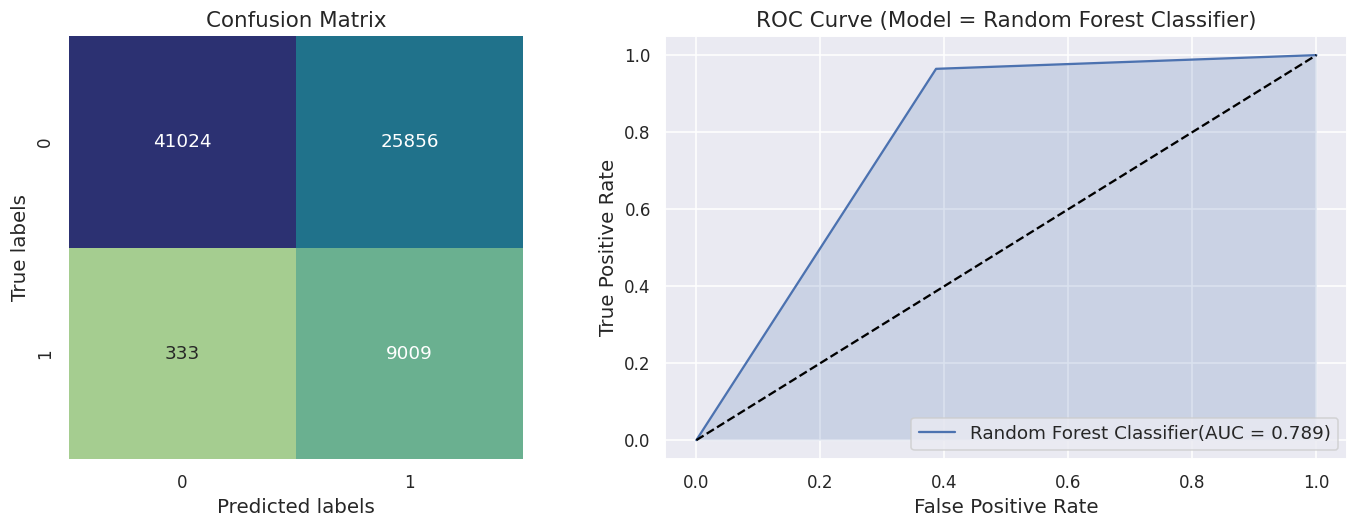

In [94]:
# Confusion matrix and ROC curve for test data
results_visualization(Y_test,Y_test_pred_rf,'Random Forest Classifier')

* The third algorithm that we have used is Random Forest. It gives a recall value of 0.964 on test data, which means it is able to identify 96.4 percent of interested customers correctly. That means our model performs very well on test data.


* The precision value is 0.258 and the ROC AUC score is 0.789, so we can conclude that the performance of Random Forest and Logistic Regression is comparable.


* In the next step, we will perform hyperparameter tuning to find the best parameters for the random forest model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# Import Required Libraries
from sklearn.model_selection import RandomizedSearchCV

In [96]:
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
randomforest = RandomForestClassifier(n_estimators = 100,random_state = 0)
parameters = {'max_depth':[4,5,6],'max_features':[0.6,0.7,0.8,0.9]}
randomforest_classifier_cv =  RandomizedSearchCV(randomforest,parameters, scoring='recall', cv=3,n_jobs = -1)


# Fit the Algorithm
randomforest_classifier_cv.fit(X_train_res,Y_train_res)

# Predict on the model
Y_train_pred_rf_cv = randomforest_classifier_cv.predict(X_train_res)
Y_test_pred_rf_cv = randomforest_classifier_cv.predict(X_test)

# Best parameters
print("The best parameters are found out to be :" ,randomforest_classifier_cv.best_params_)
print("\nUsing these parameters the Recall is: ", randomforest_classifier_cv.best_score_)

The best parameters are found out to be : {'max_features': 0.8, 'max_depth': 4}

Using these parameters the Recall is:  0.9624699554050368


##### Which hyperparameter optimization technique have you used and why?

* We have used RandomizedSearchCV for the optimization of hyperparameters. RandomizedSearchCV is the hyperparameter optimization or tuning technique in which only a few combinations are randomly selected from the given set of combinations. The algorithm is then run only for these chosen combinations. It is thus a smarter approach because it does not run on all the possible combinations of the given values of hyperparameters.This technique is useful when dealing with larger datasets or when we have a lot of parameters to tune.


* Using GridsearchCV with the random forest algorithm is computationally very time consuming due to the large dataset and the number of estimators to be evaluated. That's why RandomizedSearchCV is a good option.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [97]:
# Evaluation Metrics For Train and Test data
evaluationmetrics(Y_train_res,Y_test,Y_train_pred_rf_cv,Y_test_pred_rf_cv)

+--------------------+-----------------------+----------------------+
| Evaluation Metrics | Results On Train Data | Results On Test Data |
+--------------------+-----------------------+----------------------+
|   Accuracy Score   |         0.792         |        0.664         |
|  Precision Score   |         0.718         |        0.262         |
|    Recall Score    |         0.962         |        0.958         |
|      f1 Score      |         0.822         |        0.411         |
|   Roc Auc Score    |         0.792         |         0.79         |
+--------------------+-----------------------+----------------------+


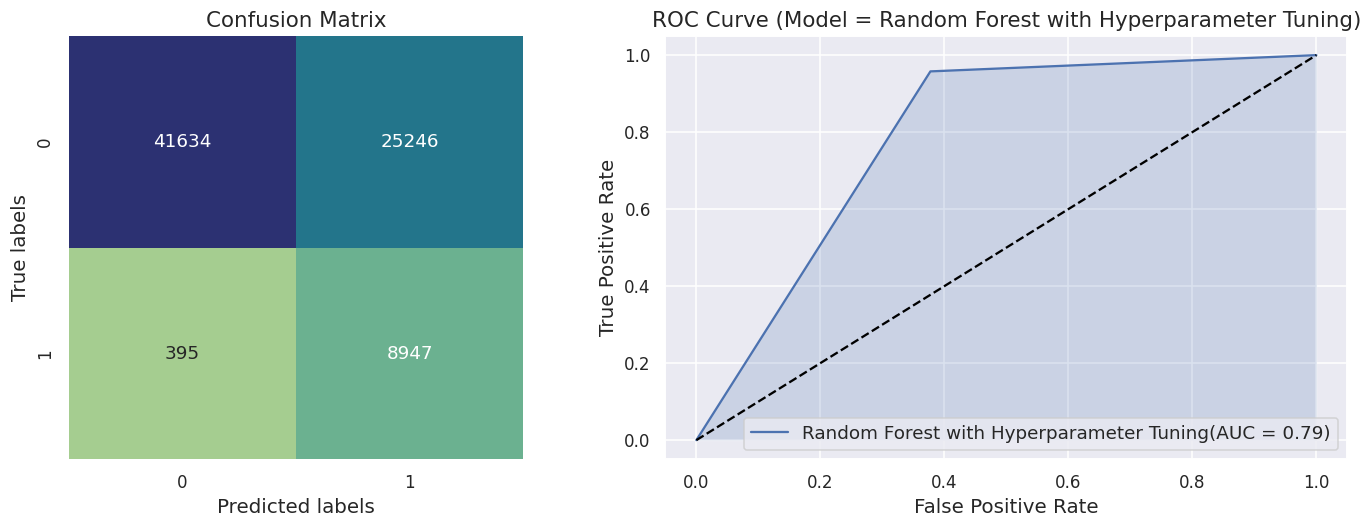

In [98]:
# Confusion matrix and ROC curve for test data
results_visualization(Y_test,Y_test_pred_rf_cv,'Random Forest with Hyperparameter Tuning')

There is no improvement even after performing the hyperparameter tuning, our model already performed well, so there is no need for hyperparameter tuning.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [99]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [100]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***